In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

In [2]:
# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

In [ ]:
df = pd.read_csv("data/full_data/TPS_cancel_data_preprocessing2.csv")

In [9]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22476020  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476021  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476022  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476023  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476024  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0             12개월~24개월미만           HD        이코노미           N   
1            24개월~ 36개월미만           HD        이코노미           N   
2            24개월~ 36개월미만           HD        이코노미           N   
3            24개월~ 36개월미만           HD        이코노미           N   
4            24개월~ 36개월미만           HD        이코노미           N   
...                   ...          ...         ...         ...   
22476020          36개월 이상           HD         베이직           N   
22476021          36개월 이상           HD         베이직           N   
22476022          36개월 이상           HD         베이직           N   
22476023          36개월 이상           HD         베이직           N   
22476024          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22476020                N           신규             N                0건   
22476021                N           신규             N                0건   
22476022                N           신규             N                0건   
22476023                N           신규             N                0건   
22476024                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22476020                0건             현장경로        10.0  약정만료후 12개월이상   
22476021                0건             현장경로        10.0  약정만료후 12개월이상   
22476022                0건             현장경로        10.0  약정만료후 12개월이상   
22476023                0건             현장경로         0.0  약정만료후 12개월이상   
22476024                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS  TV_SCRB  ANALOG_SCRB  DIGITAL_SCRB  \
0            20240325              733     2.00         0.00          2.00   
1            20240325              764     2.00         0.00          2.00   
2            20240325              794     2.00         0.00          2.00   
3            20240325              825     2.00         0.00          2.00   
4            20240325              855     2.00         0.00          2.00   
...               ...              ...      ...          ...           ...   
22476020     20200405  

## 다중공선성 컬럼 전처리 (VIF, 히트맵으로 확인했었던 컬럼들)

## CH_25_RATIO_MONTH1과 CH_25_RATIO_MEAN_3MM 의 평균값으로 대체

둘의 상관계수는 1.0 <br>
둘의 값이 서로 다른 행은 1772개 <br>
그마저도, CH_25_RATIO_MEAN_3MM * 2 = CH_25_RATIO_MONTH1 성립 <br>

In [10]:
# 두 개의 컬럼 확인
df[['CH_25_RATIO_MONTH1','CH_25_RATIO_MEAN_3MM']]

CH_25_RATIO_MONTH1  CH_25_RATIO_MEAN_3MM
0                       0.00                  0.00
1                       3.33                  3.33
2                       3.71                  3.71
3                       3.57                  3.57
4                       6.51                  6.51
...                      ...                   ...
22476020                0.01                  0.01
22476021                0.00                  0.00
22476022                0.19                  0.19
22476023                0.00                  0.00
22476024                0.00                  0.00

[22476025 rows x 2 columns]

CH_25_RATIO_MONTH1과 CH_25_RATIO_MEAN_3MM의 값이 거의 일치한다. <BR><br>
CH_25 RATIO_MONTH1과 CH_25_RATIO_MEAN_3MM이 서로 다른 값이 있나 확인해보자

In [11]:
df_check = df[(df['CH_25_RATIO_MONTH1'] != df['CH_25_RATIO_MEAN_3MM'])][['CH_25_RATIO_MONTH1','CH_25_RATIO_MEAN_3MM']]
df_check

CH_25_RATIO_MONTH1  CH_25_RATIO_MEAN_3MM
3629                    1.17                  0.58
12085                   1.55                  0.77
14912                   2.79                  1.40
19391                  14.92                  7.46
20217                  13.33                  6.67
...                      ...                   ...
22474059                1.51                  0.75
22474060                0.69                  0.34
22474061                2.73                  1.37
22474062                2.33                  1.16
22474063                6.24                  3.12

[1722 rows x 2 columns]

CH_25_RATIO_MEAN_3MM * 2 = CH_25_RATIO_MONTH1이 성립하는 것처럼 보인다.

In [12]:
# 실제로 CH_25_RATIO_MONTH1을 2로 나눠보자.
df_check['CH_MEAN'] = (df_check['CH_25_RATIO_MONTH1'] / 2).round(2)

In [13]:
df_check

CH_25_RATIO_MONTH1  CH_25_RATIO_MEAN_3MM  CH_MEAN
3629                    1.17                  0.58     0.58
12085                   1.55                  0.77     0.78
14912                   2.79                  1.40     1.40
19391                  14.92                  7.46     7.46
20217                  13.33                  6.67     6.66
...                      ...                   ...      ...
22474059                1.51                  0.75     0.76
22474060                0.69                  0.34     0.34
22474061                2.73                  1.37     1.36
22474062                2.33                  1.16     1.16
22474063                6.24                  3.12     3.12

[1722 rows x 3 columns]

⭐ CH_25_RATIO_MONTH1과 CH_25_RATIO_MEAN_3MM의 평균값으로 하나의 컬럼 생성 후,CH_25_RATIO_MONTH1과 CH_25_RATIO_MEAN_3MM 컬럼 제거

In [14]:
df['CH_25_RATIO_1MONTH'] = df[['CH_25_RATIO_MONTH1','CH_25_RATIO_MEAN_3MM']].mean(axis=1)

In [15]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22476020  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476021  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476022  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476023  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476024  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0             12개월~24개월미만           HD        이코노미           N   
1            24개월~ 36개월미만           HD        이코노미           N   
2            24개월~ 36개월미만           HD        이코노미           N   
3            24개월~ 36개월미만           HD        이코노미           N   
4            24개월~ 36개월미만           HD        이코노미           N   
...                   ...          ...         ...         ...   
22476020          36개월 이상           HD         베이직           N   
22476021          36개월 이상           HD         베이직           N   
22476022          36개월 이상           HD         베이직           N   
22476023          36개월 이상           HD         베이직           N   
22476024          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22476020                N           신규             N                0건   
22476021                N           신규             N                0건   
22476022                N           신규             N                0건   
22476023                N           신규             N                0건   
22476024                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22476020                0건             현장경로        10.0  약정만료후 12개월이상   
22476021                0건             현장경로        10.0  약정만료후 12개월이상   
22476022                0건             현장경로        10.0  약정만료후 12개월이상   
22476023                0건             현장경로         0.0  약정만료후 12개월이상   
22476024                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS  TV_SCRB  ANALOG_SCRB  DIGITAL_SCRB  \
0            20240325              733     2.00         0.00          2.00   
1            20240325              764     2.00         0.00          2.00   
2            20240325              794     2.00         0.00          2.00   
3            20240325              825     2.00         0.00          2.00   
4            20240325              855     2.00         0.00          2.00   
...               ...              ...      ...          ...           ...   
22476020     20200405  

그리고, 원래 존재했던 'CH_25_RATIO_MONTH1', 'CH_25_RATIO_MEAN_3MM' 컬럼 두 개를 제거

In [16]:
# 두 개를 제거하면, 38개 컬럼이 남아있어야함.
df = df.drop(columns = ['CH_25_RATIO_MONTH1','CH_25_RATIO_MEAN_3MM'])

In [17]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22476020  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476021  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476022  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476023  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476024  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0             12개월~24개월미만           HD        이코노미           N   
1            24개월~ 36개월미만           HD        이코노미           N   
2            24개월~ 36개월미만           HD        이코노미           N   
3            24개월~ 36개월미만           HD        이코노미           N   
4            24개월~ 36개월미만           HD        이코노미           N   
...                   ...          ...         ...         ...   
22476020          36개월 이상           HD         베이직           N   
22476021          36개월 이상           HD         베이직           N   
22476022          36개월 이상           HD         베이직           N   
22476023          36개월 이상           HD         베이직           N   
22476024          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22476020                N           신규             N                0건   
22476021                N           신규             N                0건   
22476022                N           신규             N                0건   
22476023                N           신규             N                0건   
22476024                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22476020                0건             현장경로        10.0  약정만료후 12개월이상   
22476021                0건             현장경로        10.0  약정만료후 12개월이상   
22476022                0건             현장경로        10.0  약정만료후 12개월이상   
22476023                0건             현장경로         0.0  약정만료후 12개월이상   
22476024                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS  TV_SCRB  ANALOG_SCRB  DIGITAL_SCRB  \
0            20240325              733     2.00         0.00          2.00   
1            20240325              764     2.00         0.00          2.00   
2            20240325              794     2.00         0.00          2.00   
3            20240325              825     2.00         0.00          2.00   
4            20240325              855     2.00         0.00          2.00   
...               ...              ...      ...          ...           ...   
22476020     20200405  

## TV_SCRB + TOTAL_INTERNET_SCRB = TV_I_CNT

TV 댓수 + 인터넷 댓수 = TV, 인터넷 댓수는 당연한 말이다. <br>
그렇기때문에, TV 댓수와 인터넷 댓수를 포괄하여 설명할 수 있는 TV_I_CNT를 살린다

In [18]:
df_check = df

In [19]:
df_check[['TV_SCRB','TOTAL_INTERNET_SCRB','TV_I_CNT']].corr()

TV_SCRB  TOTAL_INTERNET_SCRB  TV_I_CNT
TV_SCRB                 1.00                 0.49      0.97
TOTAL_INTERNET_SCRB     0.49                 1.00      0.70
TV_I_CNT                0.97                 0.70      1.00

In [20]:
# TV_SCRB + TOTAL_INTERNET_SCRB = TV_I_CNT를 설명할 수 있는지 확인
df_check[['TV_SCRB','TOTAL_INTERNET_SCRB','TV_I_CNT']]

TV_SCRB  TOTAL_INTERNET_SCRB  TV_I_CNT
0            2.00                 1.00      3.00
1            2.00                 1.00      3.00
2            2.00                 1.00      3.00
3            2.00                 1.00      3.00
4            2.00                 1.00      3.00
...           ...                  ...       ...
22476020     1.00                 0.00      1.00
22476021     1.00                 0.00      1.00
22476022     1.00                 0.00      1.00
22476023     1.00                 0.00      1.00
22476024     1.00                 0.00      1.00

[22476025 rows x 3 columns]

직접 더해봐서 확인해보자.

In [21]:
df_check['TV_I_SUM'] = df_check['TV_SCRB'] + df_check['TOTAL_INTERNET_SCRB']

TV_SCRB와 TOTAL_INTERNET_SCRB을 더해서 새로 만든 TV_I_SUM과 TV_I_CNT의 값이 다른지 확인.<BR><BR>
(다르면 안됨)

In [22]:
df_check[(df_check['TV_I_SUM'] != df_check['TV_I_CNT'])]

Empty DataFrame
Columns: [sha2_hash, SVC_USE_DAYS_GRP, MEDIA_NM_GRP, PROD_NM_GRP, PROD_OLD_YN, PROD_ONE_PLUS_YN, AGMT_KIND_NM, STB_RES_1M_YN, SVOD_SCRB_CNT_GRP, PAID_CHNL_CNT_GRP, SCRB_PATH_NM_GRP, INHOME_RATE, AGMT_END_SEG, AGMT_END_YMD, TOTAL_USED_DAYS, TV_SCRB, ANALOG_SCRB, DIGITAL_SCRB, TOTAL_INTERNET_SCRB, GIGA_INTERNET_SCRB, BUNDLE_YN, DIGITAL_GIGA_YN, DIGITAL_ALOG_YN, TV_I_CNT, CH_LAST_DAYS_BF_GRP, VOC_TOTAL_MONTH1_YN, VOC_STOP_CANCEL_MONTH1_YN, AGE_GRP10, EMAIL_RECV_CLS_NM, SMS_SEND_CLS_NM, CH_HH_AVG_MONTH1, CH_FAV_RNK1, KIDS_USE_PV_MONTH1, NFX_USE_YN, YTB_USE_YN, p_mt, churn, CH_25_RATIO_1MONTH, TV_I_SUM]
Index: []

✅ TV_I_CNT는 TV_SCRB + TOTAL_INTERNET_SCRB = TV_I_CNT가 완벽하게 일치한다. 그렇기 때문에, **TV와 인터넷 댓수를 포괄하여 설명할 수 있는 TV_I_CNT를 살린다.**

In [23]:
df = df.drop(columns = ['TV_SCRB', 'TOTAL_INTERNET_SCRB'])

In [24]:
df.drop(columns = 'TV_I_SUM', axis=1, inplace=True)

In [25]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22476020  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476021  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476022  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476023  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476024  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0             12개월~24개월미만           HD        이코노미           N   
1            24개월~ 36개월미만           HD        이코노미           N   
2            24개월~ 36개월미만           HD        이코노미           N   
3            24개월~ 36개월미만           HD        이코노미           N   
4            24개월~ 36개월미만           HD        이코노미           N   
...                   ...          ...         ...         ...   
22476020          36개월 이상           HD         베이직           N   
22476021          36개월 이상           HD         베이직           N   
22476022          36개월 이상           HD         베이직           N   
22476023          36개월 이상           HD         베이직           N   
22476024          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22476020                N           신규             N                0건   
22476021                N           신규             N                0건   
22476022                N           신규             N                0건   
22476023                N           신규             N                0건   
22476024                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22476020                0건             현장경로        10.0  약정만료후 12개월이상   
22476021                0건             현장경로        10.0  약정만료후 12개월이상   
22476022                0건             현장경로        10.0  약정만료후 12개월이상   
22476023                0건             현장경로         0.0  약정만료후 12개월이상   
22476024                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS  ANALOG_SCRB  DIGITAL_SCRB  \
0            20240325              733         0.00          2.00   
1            20240325              764         0.00          2.00   
2            20240325              794         0.00          2.00   
3            20240325              825         0.00          2.00   
4            20240325              855         0.00          2.00   
...               ...              ...          ...           ...   
22476020     20200405             2338         0.00          1.00   
22476021     2020

## TV_I_CNT, DIGITAL_SCRB

원래는 DIGITAL_SCRB와 TV_SCRB의 상관계수가 높았다. <br>
그리고, TV_SCRB으로 TV_I_CNT를 설명할 수 있었기에, DIGITAL_SCRB으로도 TV_I_CNT를 설명할 수 있을 것 같다.

In [26]:
df[['TV_I_CNT', 'DIGITAL_SCRB']]

TV_I_CNT  DIGITAL_SCRB
0             3.00          2.00
1             3.00          2.00
2             3.00          2.00
3             3.00          2.00
4             3.00          2.00
...            ...           ...
22476020      1.00          1.00
22476021      1.00          1.00
22476022      1.00          1.00
22476023      1.00          1.00
22476024      1.00          1.00

[22476025 rows x 2 columns]

In [27]:
df[(df['TV_I_CNT'] < df['DIGITAL_SCRB'])]

Empty DataFrame
Columns: [sha2_hash, SVC_USE_DAYS_GRP, MEDIA_NM_GRP, PROD_NM_GRP, PROD_OLD_YN, PROD_ONE_PLUS_YN, AGMT_KIND_NM, STB_RES_1M_YN, SVOD_SCRB_CNT_GRP, PAID_CHNL_CNT_GRP, SCRB_PATH_NM_GRP, INHOME_RATE, AGMT_END_SEG, AGMT_END_YMD, TOTAL_USED_DAYS, ANALOG_SCRB, DIGITAL_SCRB, GIGA_INTERNET_SCRB, BUNDLE_YN, DIGITAL_GIGA_YN, DIGITAL_ALOG_YN, TV_I_CNT, CH_LAST_DAYS_BF_GRP, VOC_TOTAL_MONTH1_YN, VOC_STOP_CANCEL_MONTH1_YN, AGE_GRP10, EMAIL_RECV_CLS_NM, SMS_SEND_CLS_NM, CH_HH_AVG_MONTH1, CH_FAV_RNK1, KIDS_USE_PV_MONTH1, NFX_USE_YN, YTB_USE_YN, p_mt, churn, CH_25_RATIO_1MONTH]
Index: []

TV_I_CNT > DIGITAL_SCRB가 항상 성립하니, DIGITAL_SCRB을 제거하는 편이 더 나아보인다.

✅ 서로 간의 상관계수도 파악을 해보자.

In [28]:
correlation = df['TV_I_CNT'].corr(df['DIGITAL_SCRB'])

print(f"✳️ TV_I_CNT와 DIGITAL_SCRB 간의 상관계수 파악 : {correlation:.3f}")

✳️ TV_I_CNT와 DIGITAL_SCRB 간의 상관계수 파악 : 0.964


둘 간의 상관계수가 0.964이므로 매우 강한 양의 상관관계를 나타냄. DIGITAL_SCRB를 제거함으로써, 다중공산성을 줄임.

In [29]:
df = df.drop(columns = ['DIGITAL_SCRB'])

In [30]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22476020  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476021  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476022  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476023  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476024  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0             12개월~24개월미만           HD        이코노미           N   
1            24개월~ 36개월미만           HD        이코노미           N   
2            24개월~ 36개월미만           HD        이코노미           N   
3            24개월~ 36개월미만           HD        이코노미           N   
4            24개월~ 36개월미만           HD        이코노미           N   
...                   ...          ...         ...         ...   
22476020          36개월 이상           HD         베이직           N   
22476021          36개월 이상           HD         베이직           N   
22476022          36개월 이상           HD         베이직           N   
22476023          36개월 이상           HD         베이직           N   
22476024          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22476020                N           신규             N                0건   
22476021                N           신규             N                0건   
22476022                N           신규             N                0건   
22476023                N           신규             N                0건   
22476024                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22476020                0건             현장경로        10.0  약정만료후 12개월이상   
22476021                0건             현장경로        10.0  약정만료후 12개월이상   
22476022                0건             현장경로        10.0  약정만료후 12개월이상   
22476023                0건             현장경로         0.0  약정만료후 12개월이상   
22476024                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS  ANALOG_SCRB  GIGA_INTERNET_SCRB  \
0            20240325              733         0.00                1.00   
1            20240325              764         0.00                1.00   
2            20240325              794         0.00                1.00   
3            20240325              825         0.00                1.00   
4            20240325              855         0.00                1.00   
...               ...              ...          ...                 ...   
22476020     20200405             2338      

### ✅ GIGA_INTERNET_SCRB, DIGITAL_GIGA_YN
### ✅ ANALOG_SCRB, DIGITAL_ALOG_YN

우리가 만드는 해지 예측 모델에서는 GIGA_INTERNET을 얼마나 많이 사용하냐의 관점이 아니라<br><BR>
그 사람이 기가 인터넷을 사용하는지, 사용하지 않는지가 중요한 문제이다.<br><BR>
그렇기 때문에, GIGA_INTERNET_SCRB와 ANALOG_SCRB을 제거한다.

In [31]:
# GIGA_INTERNET_SCRB의 값이 1.0 이상이면 DIGITAL_GIGA_YN의 값은 Y이다.

display(df[['GIGA_INTERNET_SCRB', 'DIGITAL_GIGA_YN']])
print("")
display(df[['ANALOG_SCRB', 'DIGITAL_ALOG_YN']])

GIGA_INTERNET_SCRB DIGITAL_GIGA_YN
0                       1.00               Y
1                       1.00               Y
2                       1.00               Y
3                       1.00               Y
4                       1.00               Y
...                      ...             ...
22476020                0.00               N
22476021                0.00               N
22476022                0.00               N
22476023                0.00               N
22476024                0.00               N

[22476025 rows x 2 columns]

ANALOG_SCRB DIGITAL_ALOG_YN
0                0.00               N
1                0.00               N
2                0.00               N
3                0.00               N
4                0.00               N
...               ...             ...
22476020         0.00               N
22476021         0.00               N
22476022         0.00               N
22476023         0.00               N
22476024         0.00               N

[22476025 rows x 2 columns]

In [32]:
# 기가 인터넷을 사용하는 유저인데, DIGITAL_GIGA_YN의 값이 N인 경우 <- 위의 경우를 확인할 수 있음.

df[(df['GIGA_INTERNET_SCRB'] >= 1) & (df['DIGITAL_GIGA_YN'] == 'N')]

Empty DataFrame
Columns: [sha2_hash, SVC_USE_DAYS_GRP, MEDIA_NM_GRP, PROD_NM_GRP, PROD_OLD_YN, PROD_ONE_PLUS_YN, AGMT_KIND_NM, STB_RES_1M_YN, SVOD_SCRB_CNT_GRP, PAID_CHNL_CNT_GRP, SCRB_PATH_NM_GRP, INHOME_RATE, AGMT_END_SEG, AGMT_END_YMD, TOTAL_USED_DAYS, ANALOG_SCRB, GIGA_INTERNET_SCRB, BUNDLE_YN, DIGITAL_GIGA_YN, DIGITAL_ALOG_YN, TV_I_CNT, CH_LAST_DAYS_BF_GRP, VOC_TOTAL_MONTH1_YN, VOC_STOP_CANCEL_MONTH1_YN, AGE_GRP10, EMAIL_RECV_CLS_NM, SMS_SEND_CLS_NM, CH_HH_AVG_MONTH1, CH_FAV_RNK1, KIDS_USE_PV_MONTH1, NFX_USE_YN, YTB_USE_YN, p_mt, churn, CH_25_RATIO_1MONTH]
Index: []

In [33]:
df[(df['ANALOG_SCRB'] >= 1) & (df['DIGITAL_ALOG_YN'] == 'N')]

Empty DataFrame
Columns: [sha2_hash, SVC_USE_DAYS_GRP, MEDIA_NM_GRP, PROD_NM_GRP, PROD_OLD_YN, PROD_ONE_PLUS_YN, AGMT_KIND_NM, STB_RES_1M_YN, SVOD_SCRB_CNT_GRP, PAID_CHNL_CNT_GRP, SCRB_PATH_NM_GRP, INHOME_RATE, AGMT_END_SEG, AGMT_END_YMD, TOTAL_USED_DAYS, ANALOG_SCRB, GIGA_INTERNET_SCRB, BUNDLE_YN, DIGITAL_GIGA_YN, DIGITAL_ALOG_YN, TV_I_CNT, CH_LAST_DAYS_BF_GRP, VOC_TOTAL_MONTH1_YN, VOC_STOP_CANCEL_MONTH1_YN, AGE_GRP10, EMAIL_RECV_CLS_NM, SMS_SEND_CLS_NM, CH_HH_AVG_MONTH1, CH_FAV_RNK1, KIDS_USE_PV_MONTH1, NFX_USE_YN, YTB_USE_YN, p_mt, churn, CH_25_RATIO_1MONTH]
Index: []

⭐ 디지털 기가, 아날로그 사용여부(Y/N)은 간단하면서도 강력한 기준으로 사용할 수 있음.<BR><BR>
GIGA_INTERNET_SCRB와 ANALOG_SCRB는 분포가 0과 1에 편향되어 있고, 이상치가 존재하기 때문에 DIGITAL_GIGA_YN과 DIGITAL_ALOG_YN을 남긴다.<BR><BR>
분포가 0과 1에 몰려있다면, [N,Y]와 비슷하다고 생각하였다.

In [34]:
df = df.drop(columns = ['GIGA_INTERNET_SCRB','ANALOG_SCRB'])

In [35]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22476020  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476021  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476022  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476023  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476024  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0             12개월~24개월미만           HD        이코노미           N   
1            24개월~ 36개월미만           HD        이코노미           N   
2            24개월~ 36개월미만           HD        이코노미           N   
3            24개월~ 36개월미만           HD        이코노미           N   
4            24개월~ 36개월미만           HD        이코노미           N   
...                   ...          ...         ...         ...   
22476020          36개월 이상           HD         베이직           N   
22476021          36개월 이상           HD         베이직           N   
22476022          36개월 이상           HD         베이직           N   
22476023          36개월 이상           HD         베이직           N   
22476024          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22476020                N           신규             N                0건   
22476021                N           신규             N                0건   
22476022                N           신규             N                0건   
22476023                N           신규             N                0건   
22476024                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22476020                0건             현장경로        10.0  약정만료후 12개월이상   
22476021                0건             현장경로        10.0  약정만료후 12개월이상   
22476022                0건             현장경로        10.0  약정만료후 12개월이상   
22476023                0건             현장경로         0.0  약정만료후 12개월이상   
22476024                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
0            20240325              733         Y               Y   
1            20240325              764         Y               Y   
2            20240325              794         Y               Y   
3            20240325              825         Y               Y   
4            20240325              855         Y               Y   
...               ...              ...       ...             ...   
22476020     20200405             2338         N               N   
22476021     20200405    

다중 공산성 문제를 일으킬 수 있는 컬럼들 제거!

### 컬럼 제거 파일 생성

In [36]:
df.to_csv("data/full_data/TPS_cancel_data_preprocessing3.csv", index=False)

---

In [4]:
df = pd.read_csv("data/full_data/TPS_cancel_data_preprocessing3.csv")

## p_mt가 일정하게 증가하지 않은 유저들 -> LG헬로비전 측에서는 강사님과 상의 후 결정하라고 함.

그래서, 이렇게 p_mt가 차근차근 +1씩 증가되는 경우가 아니라, <br>갑자기 갑이 껑충뛰는 경우는 모델학습에서 일반적인 경우에 영향을 끼칠 수도 있고, 팀에서 churn을 만드는 과정에서도 문제가 생길 수 있는 데이터들이기 때문에 <br>일단 따로 p_mt_outlier.csv로 빼놓고 진행한다.

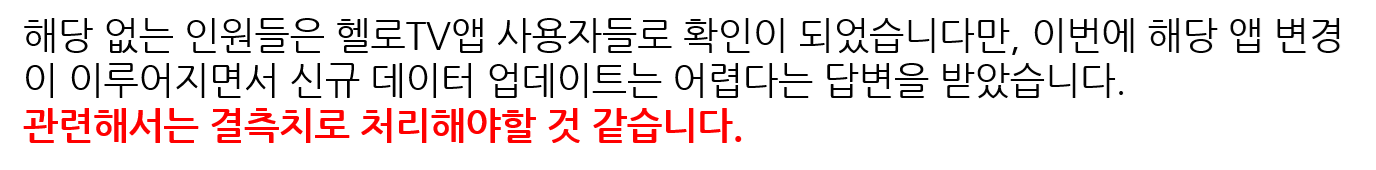

결측치로 처리하고 진행하라고 함.

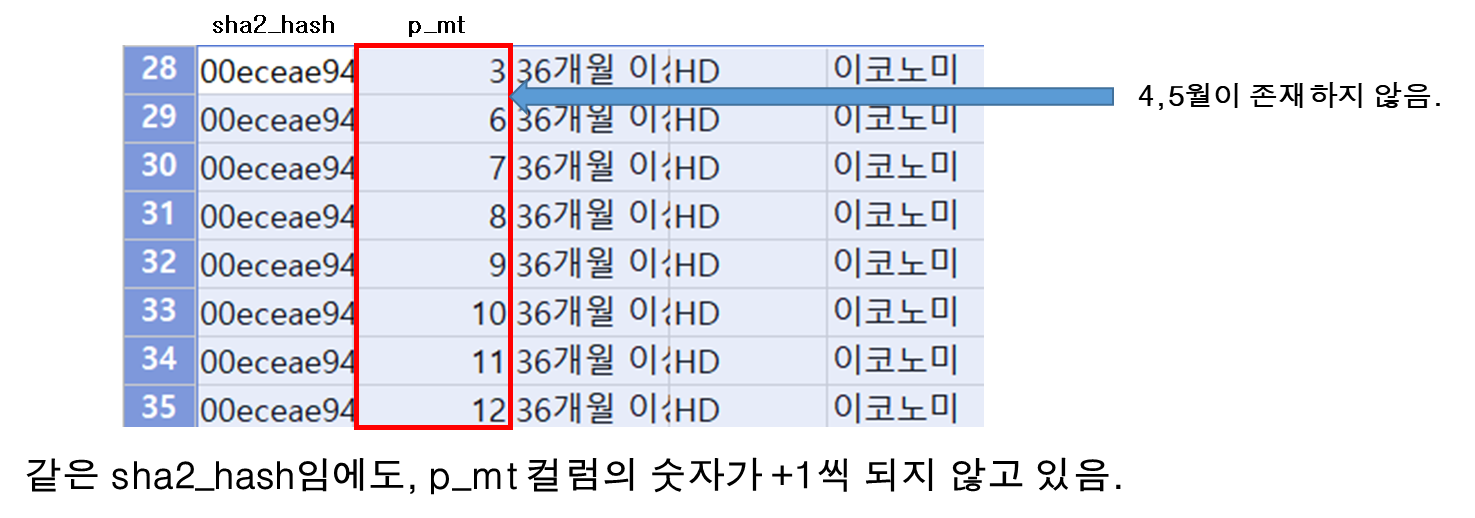

In [5]:
# 각 sha2_hash별 조건 계산
sha2_stats = df.groupby('sha2_hash')['p_mt'].agg(
    min_value='min',  # p_mt의 최소값
    max_value='max'   # p_mt의 최대값
).reset_index()

# 각 sha2_hash별 중복 개수 계산
sha2_counts = df['sha2_hash'].value_counts().reset_index()
sha2_counts.columns = ['sha2_hash', 'count']

# 조건 합치기
sha2_stats = sha2_stats.merge(sha2_counts, on='sha2_hash')

# 조건 확인: min + (count - 1) != max
p_mt_outliers_sha2 = sha2_stats[sha2_stats['min_value'] + (sha2_stats['count'] - 1) != sha2_stats['max_value']]

# 원래 데이터에서 조건이 성립하지 않는 id 필터링
p_mt_outliers = df[df['sha2_hash'].isin(p_mt_outliers_sha2['sha2_hash'])]

In [6]:
p_mt_outliers

sha2_hash  \
1456      0004301bacc6e3aebd05e7179740237a7627cbafc04f30511dc9d7f8820c5d56   
1457      0004301bacc6e3aebd05e7179740237a7627cbafc04f30511dc9d7f8820c5d56   
1458      0004301bacc6e3aebd05e7179740237a7627cbafc04f30511dc9d7f8820c5d56   
1459      0004301bacc6e3aebd05e7179740237a7627cbafc04f30511dc9d7f8820c5d56   
20368     003b32b9faba655437f534539b318f1883d35c81ba73ad7e5ae202b2ebcd598d   
...                                                                    ...   
22453696  ffbe77dbae512e50e5df8a8767fba1e0fa1a52232d8ad2a1dcd046fe142dae1d   
22453697  ffbe77dbae512e50e5df8a8767fba1e0fa1a52232d8ad2a1dcd046fe142dae1d   
22453698  ffbe77dbae512e50e5df8a8767fba1e0fa1a52232d8ad2a1dcd046fe142dae1d   
22453699  ffbe77dbae512e50e5df8a8767fba1e0fa1a52232d8ad2a1dcd046fe142dae1d   
22453700  ffbe77dbae512e50e5df8a8767fba1e0fa1a52232d8ad2a1dcd046fe142dae1d   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
1456         24개월~ 36개월미만           HD        이코노미           N   
1457         24개월~ 36개월미만           HD        이코노미           N   
1458         24개월~ 36개월미만           HD        이코노미           N   
1459         24개월~ 36개월미만           HD        이코노미           N   
20368          6개월~12개월미만           HD        이코노미           N   
...                   ...          ...         ...         ...   
22453696          36개월 이상           HD         베이직           N   
22453697          36개월 이상           HD         베이직           N   
22453698          36개월 이상           HD         베이직           N   
22453699          36개월 이상           HD         베이직           N   
22453700          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
1456                    N           신규             Y                0건   
1457                    N           신규             Y                0건   
1458                    N           신규             Y                0건   
1459                    N           신규             Y                0건   
20368                   N           신규             N                0건   
...                   ...          ...           ...               ...   
22453696                N          재약정             Y                0건   
22453697                N          재약정             Y                0건   
22453698                N          재약정             N                0건   
22453699                N          재약정             Y                0건   
22453700                N          재약정             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
1456                    0건             현장경로         0.0  약정만료전 9~12개월   
1457                    0건             현장경로        알수없음   약정만료전 6~9개월   
1458                    0건             현장경로        알수없음   약정만료전 2~3개월   
1459                    0건             현장경로         0.0     약정만료전 1개월   
20368                   0건             현장경로        알수없음  약정만료전 12개월이상   
...                    ...              ...         ...           ...   
22453696                0건             현장경로        알수없음  약정만료전 12개월이상   
22453697                0건             현장경로        알수없음  약정만료전 12개월이상   
22453698                0건             현장경로        알수없음  약정만료전 12개월이상   
22453699                0건             현장경로        알수없음  약정만료전 12개월이상   
22453700                0건             현장경로        알수없음  약정만료전 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
1456         20240129             1411         N               N   
1457         20240129             1533         N               N   
1458         20240129             1655         N               N   
1459         20240129             1686         N               N   
20368        20251011             2392         Y               Y   
...               ...              ...       ...             ...   
22453696     20270726             1526         Y               N   
22453697     20270726    

In [8]:
# 해당 유저는 9월이 존재하지 않음.

df[df['sha2_hash'] == '003b32b9faba655437f534539b318f1883d35c81ba73ad7e5ae202b2ebcd598d']

sha2_hash  \
20368  003b32b9faba655437f534539b318f1883d35c81ba73ad7e5ae202b2ebcd598d   
20369  003b32b9faba655437f534539b318f1883d35c81ba73ad7e5ae202b2ebcd598d   
20370  003b32b9faba655437f534539b318f1883d35c81ba73ad7e5ae202b2ebcd598d   
20371  003b32b9faba655437f534539b318f1883d35c81ba73ad7e5ae202b2ebcd598d   
20372  003b32b9faba655437f534539b318f1883d35c81ba73ad7e5ae202b2ebcd598d   
20373  003b32b9faba655437f534539b318f1883d35c81ba73ad7e5ae202b2ebcd598d   
20374  003b32b9faba655437f534539b318f1883d35c81ba73ad7e5ae202b2ebcd598d   
20375  003b32b9faba655437f534539b318f1883d35c81ba73ad7e5ae202b2ebcd598d   

      SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN PROD_ONE_PLUS_YN  \
20368       6개월~12개월미만           HD        이코노미           N                N   
20369       6개월~12개월미만           HD        이코노미           N                N   
20370       6개월~12개월미만           HD        이코노미           N                N   
20371       6개월~12개월미만           HD        이코노미           N                N   
20372       6개월~12개월미만           HD        이코노미           N                N   
20373      12개월~24개월미만           HD        이코노미           N                N   
20374      12개월~24개월미만           HD        이코노미           N                N   
20375      12개월~24개월미만           HD        이코노미           N                N   

      AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP PAID_CHNL_CNT_GRP  \
20368           신규             N                0건                0건   
20369           신규             N                0건                0건   
20370           신규             N                0건                0건   
20371           신규             N                0건                0건   
20372           신규             N                0건                0건   
20373           신규             Y                0건                0건   
20374           신규             Y                0건                0건   
20375           신규             Y                0건                0건   

      SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG AGMT_END_YMD  \
20368             현장경로        알수없음  약정만료전 12개월이상     20251011   
20369             현장경로        알수없음  약정만료전 12개월이상     20251011   
20370             현장경로        알수없음  약정만료전 12개월이상     20251011   
20371             현장경로        알수없음  약정만료전 12개월이상     20251011   
20372             현장경로        알수없음  약정만료전 12개월이상     20251011   
20373             현장경로        알수없음  약정만료전 12개월이상     20251011   
20374             현장경로        알수없음  약정만료전 12개월이상     20251011   
20375             현장경로        알수없음  약정만료전 12개월이상     20251011   

       TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN DIGITAL_ALOG_YN  TV_I_CNT  \
20368             2392         Y               Y               N      4.00   
20369             2423         Y               Y               N      4.00   
20370             2453         Y               Y               N      4.00   
20371             2484         Y               Y               N      4.00   
20372             2515         Y               Y               N      4.00   
20373             2576         Y               Y               N      6.00   
20374             2606         Y               Y               N      6.00   
20375             2637         Y               Y               N      6.00   

      CH_LAST_DAYS_BF_GRP VOC_TOTAL_MONTH1_YN VOC_STOP_CANCEL_MONTH1_YN  \
20368              3개월내없음                   Y                         N   
20369              3개월내없음                   Y                         N   
20370              3개월내없음                   Y                         N   
20371              3개월내없음                   Y                         Y   
20372              3개월내없음                   Y                         N   
20373              3개월내없음                   Y                         N   
20374              3개월내없음                   Y                         N   
20375              3개월내없음                   Y                         N   

      AGE_GRP10 EMAIL_RECV_CLS_NM SMS_SEND_CLS_NM  

In [9]:
p_mt_outliers.to_csv('data/full_data/p_mt_outliers.csv', index=False)

### 본 데이터 df에서 p_mt_outliers에 있는 데이터들 drop

In [10]:
outliers_ids = p_mt_outliers['sha2_hash'].unique()

In [11]:
# 전체 데이터 df에서 이상치를 가지는 sha2_hash 제거
df = df[~df['sha2_hash'].isin(outliers_ids)]

In [12]:
# 22,467,012 행이 되어야 함.
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22476020  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476021  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476022  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476023  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22476024  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0             12개월~24개월미만           HD        이코노미           N   
1            24개월~ 36개월미만           HD        이코노미           N   
2            24개월~ 36개월미만           HD        이코노미           N   
3            24개월~ 36개월미만           HD        이코노미           N   
4            24개월~ 36개월미만           HD        이코노미           N   
...                   ...          ...         ...         ...   
22476020          36개월 이상           HD         베이직           N   
22476021          36개월 이상           HD         베이직           N   
22476022          36개월 이상           HD         베이직           N   
22476023          36개월 이상           HD         베이직           N   
22476024          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22476020                N           신규             N                0건   
22476021                N           신규             N                0건   
22476022                N           신규             N                0건   
22476023                N           신규             N                0건   
22476024                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22476020                0건             현장경로        10.0  약정만료후 12개월이상   
22476021                0건             현장경로        10.0  약정만료후 12개월이상   
22476022                0건             현장경로        10.0  약정만료후 12개월이상   
22476023                0건             현장경로         0.0  약정만료후 12개월이상   
22476024                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
0            20240325              733         Y               Y   
1            20240325              764         Y               Y   
2            20240325              794         Y               Y   
3            20240325              825         Y               Y   
4            20240325              855         Y               Y   
...               ...              ...       ...             ...   
22476020     20200405             2338         N               N   
22476021     20200405    

In [13]:
df.to_csv("data/full_data/TPS_cancel_data_preprocessing4.csv", index=False)

---

In [14]:
df = pd.read_csv('data/full_data/TPS_cancel_data_preprocessing4.csv')

## 연속형 변수들 이상치 확인 (boxplot)

In [15]:
df.dtypes

sha2_hash                     object
SVC_USE_DAYS_GRP              object
MEDIA_NM_GRP                  object
PROD_NM_GRP                   object
PROD_OLD_YN                   object
PROD_ONE_PLUS_YN              object
AGMT_KIND_NM                  object
STB_RES_1M_YN                 object
SVOD_SCRB_CNT_GRP             object
PAID_CHNL_CNT_GRP             object
SCRB_PATH_NM_GRP              object
INHOME_RATE                   object
AGMT_END_SEG                  object
AGMT_END_YMD                  object
TOTAL_USED_DAYS                int64
BUNDLE_YN                     object
DIGITAL_GIGA_YN               object
DIGITAL_ALOG_YN               object
TV_I_CNT                     float64
CH_LAST_DAYS_BF_GRP           object
VOC_TOTAL_MONTH1_YN           object
VOC_STOP_CANCEL_MONTH1_YN     object
AGE_GRP10                     object
EMAIL_RECV_CLS_NM             object
SMS_SEND_CLS_NM               object
CH_HH_AVG_MONTH1             float64
CH_FAV_RNK1                   object
K

In [16]:
continuous_columns = df.select_dtypes(include=['int64','float64'])

In [17]:
continuous_columns = continuous_columns.drop(columns=['p_mt'])

In [18]:
continuous_columns

TOTAL_USED_DAYS  TV_I_CNT  CH_HH_AVG_MONTH1  KIDS_USE_PV_MONTH1  \
0                     733      3.00              0.00                0.00   
1                     764      3.00              6.72                0.00   
2                     794      3.00              9.86                0.00   
3                     825      3.00              5.95                0.00   
4                     855      3.00              4.03                0.00   
...                   ...       ...               ...                 ...   
22467007             2338      1.00              2.03                0.00   
22467008             2368      1.00              2.91                1.00   
22467009             2399      1.00              1.97                0.00   
22467010             2429      1.00              0.00                0.00   
22467011             2460      1.00              0.00                0.00   

          CH_25_RATIO_1MONTH  
0                       0.00  
1                       3.33  
2                       3.71  
3                       3.57  
4                       6.51  
...                      ...  
22467007                0.01  
22467008                0.00  
22467009                0.19  
22467010                0.00  
22467011                0.00  

[22467012 rows x 5 columns]

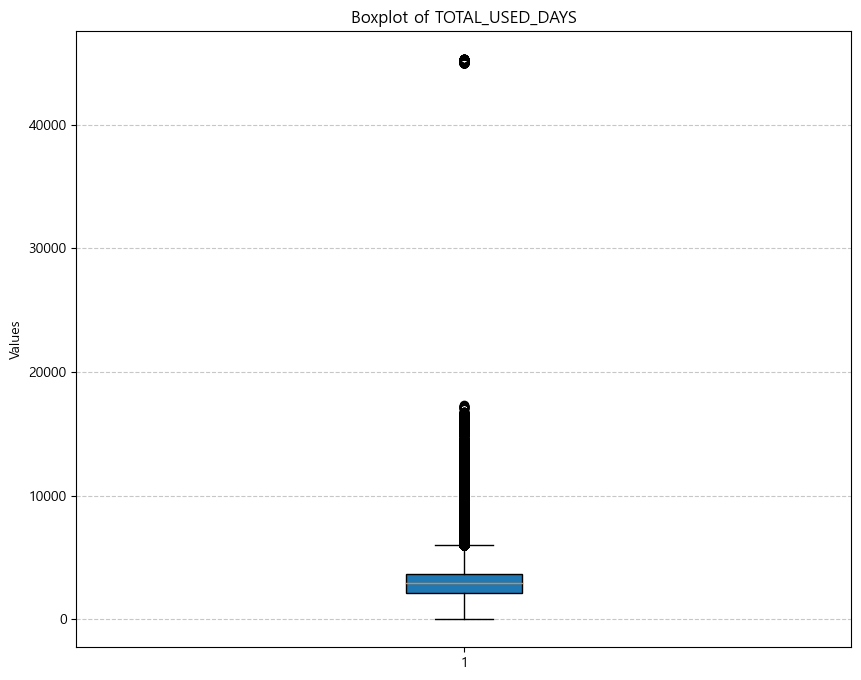

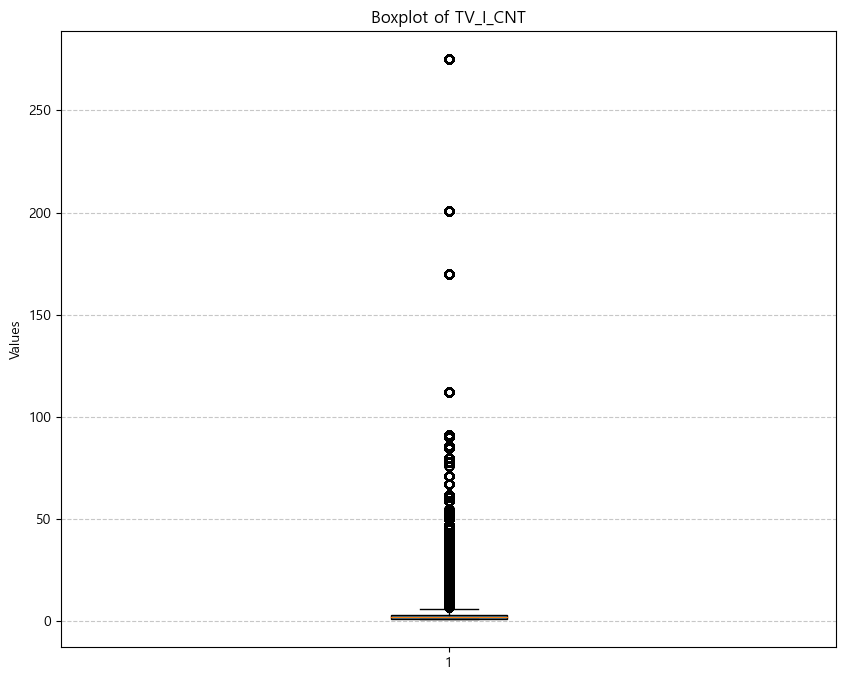

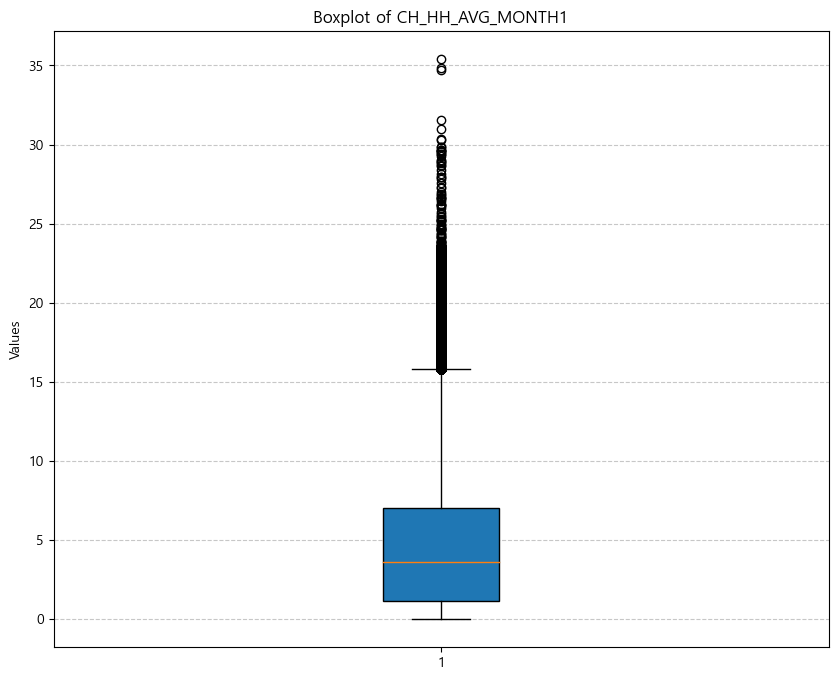

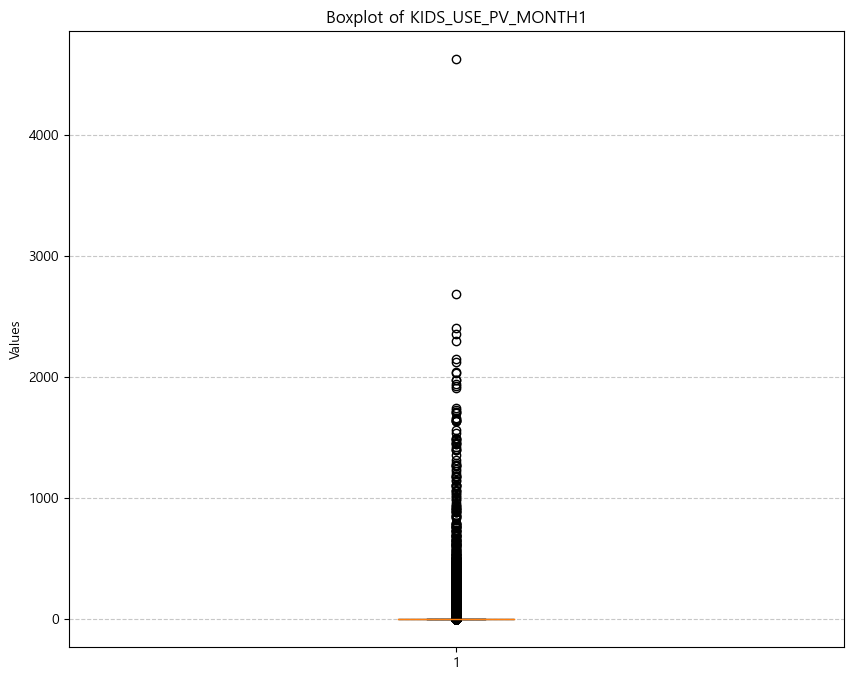

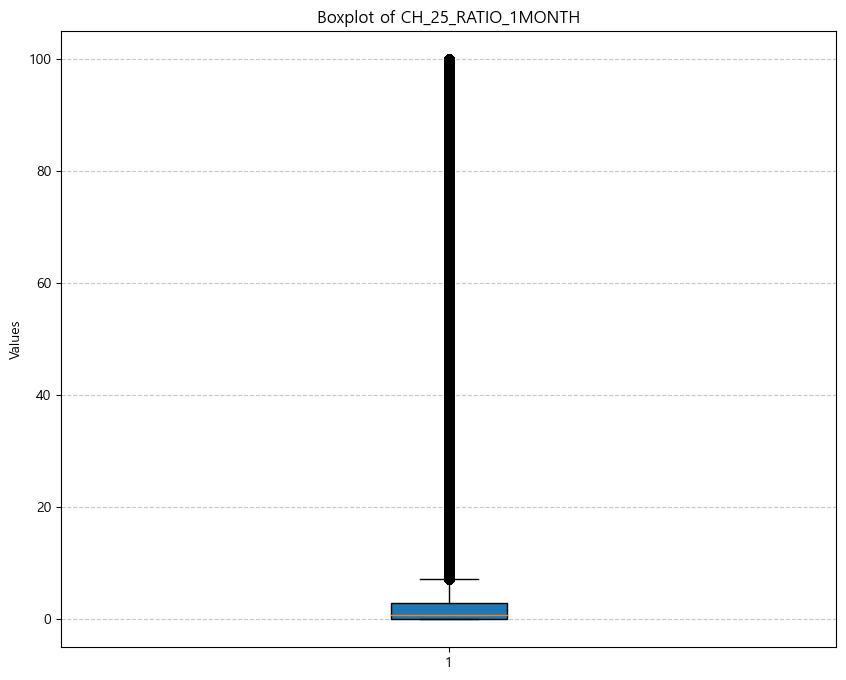

In [19]:
# 연속형 변수들 boxplot 확인

for column in continuous_columns.columns:
    plt.figure(figsize=(10, 8))
    plt.boxplot(df[column], patch_artist=True)
    plt.title(f"Boxplot of {column}")
    plt.ylabel("Values")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [20]:
# 박스 플롯의 통계를 시각적으로

for column in continuous_columns:
    print(f"\n✅ {column} - 박스플롯 통계")
    
    # 기본 통계값
    desc = df[column].describe()
    # IQR 계산
    iqr = desc['75%'] - desc['25%']
    
    # 하한값 및 상한값 계산
    lower_bound = desc['25%'] - 1.5 * iqr
    upper_bound = desc['75%'] + 1.5 * iqr

    # 출력
    print(f"최솟값 (Min): {desc['min']}")
    print(f"1사분위수 (Q1): {desc['25%']}")
    print(f"중앙값 (Median): {desc['50%']}")
    print(f"3사분위수 (Q3): {desc['75%']}")
    print(f"최댓값 (Max): {desc['max']}")
    print(f"IQR: {iqr}")
    print(f"하한값 (Lower Bound): {lower_bound}")
    print(f"상한값 (Upper Bound): {upper_bound}")



✅ TOTAL_USED_DAYS - 박스플롯 통계
최솟값 (Min): 0.0
1사분위수 (Q1): 2096.0
중앙값 (Median): 2920.0
3사분위수 (Q3): 3648.0
최댓값 (Max): 45289.0
IQR: 1552.0
하한값 (Lower Bound): -232.0
상한값 (Upper Bound): 5976.0

✅ TV_I_CNT - 박스플롯 통계
최솟값 (Min): 1.0
1사분위수 (Q1): 1.0
중앙값 (Median): 2.0
3사분위수 (Q3): 3.0
최댓값 (Max): 275.0
IQR: 2.0
하한값 (Lower Bound): -2.0
상한값 (Upper Bound): 6.0

✅ CH_HH_AVG_MONTH1 - 박스플롯 통계
최솟값 (Min): 0.0
1사분위수 (Q1): 1.16
중앙값 (Median): 3.62
3사분위수 (Q3): 7.03
최댓값 (Max): 35.39
IQR: 5.87
하한값 (Lower Bound): -7.645
상한값 (Upper Bound): 15.835

✅ KIDS_USE_PV_MONTH1 - 박스플롯 통계
최솟값 (Min): 0.0
1사분위수 (Q1): 0.0
중앙값 (Median): 0.0
3사분위수 (Q3): 0.0
최댓값 (Max): 4621.0
IQR: 0.0
하한값 (Lower Bound): 0.0
상한값 (Upper Bound): 0.0

✅ CH_25_RATIO_1MONTH - 박스플롯 통계
최솟값 (Min): 0.0
1사분위수 (Q1): 0.0
중앙값 (Median): 0.83
3사분위수 (Q3): 2.89
최댓값 (Max): 100.0
IQR: 2.89
하한값 (Lower Bound): -4.335
상한값 (Upper Bound): 7.225


전처리 하면서, 한 번 더 연속형 변수들 EDA

#### 📊 TOTAL_USED_DAYS 컬럼 분석

##### ✅ 주요 통계 지표

- **최솟값 (Min) - `0.0`**
  - `0일`부터 시작하는 **가장 최신 고객도 존재**

- **1사분위수 (Q1) - `2096`**
  - **하위 25% 고객**들은 `2096일` 정도의 총 사용일수를 가짐

- **중앙값 (Median) - `2920`**
  - **절반(50%)의 고객**들이 `2920일` 정도의 총 사용일수를 가짐
  - 중앙값이 **약 8년(2920일)** 이므로, 해당 데이터는 **오래 사용한 고객들이 많음**

- **3사분위수 (Q3) - `3648`**
  - **상위 25% 고객**들은 `3648일` 정도의 총 사용일수를 가짐

- **IQR (사분범위) = `Q3 - Q1 = 3648 - 2096 = 1552`**
  - 중간에 있는 고객들은 `2096일 ~ 3648일` 사이에서 서비스 이용
  
- **이상치 여부**
  - **상한값(Upper Bound) = `5976`**, 이 값을 초과하는 데이터는 **이상치 가능성** 높음
  - `최댓값(Max) = 45289일` → **극단적인 이상치 가능성** 있음
  - `TOTAL_USED_DAYS > 5976`인 데이터에 대해 **이상치 처리 필요**
---
#### 📊 TV_I_CNT 컬럼 분석

##### ✅ 주요 통계 지표

- **최솟값 (Min) - `1.0`**
  - 모든 고객들은 TV, 인터넷을 무조건 `1대`이상 가지고 있음

- **1사분위수 (Q1) - `1.0`**
  - **하위 25% 고객**들은 TV,인터넷을 `1대` 가지고 있음

- **중앙값 (Median) - `2.0`**
  - **절반(50%)의 고객**들이 TV,인터넷을 `2대` 가지고 있음

- **3사분위수 (Q3) - `3.0`**
  - **상위 25% 고객**들은 TV,인터넷을 `3대`가지고 있음
  - 1사분위수, 중앙값, 3사분위수 값이 1~3이므로, 대부분의 고객은 가정에서 `1대에서 3대`의 TV, 인터넷을 사용하고 있음을 알아냄

- **IQR (사분범위) = `Q3 - Q1 = 3.0 - 1.0 = 2.0`**
  - 중간에 있는 고객들은 `1대 ~ 3대`의 TV, 인터넷을 가지고 있음
  
- **이상치 여부**
  - **상한값(Upper Bound) = `6.0`**, 이 값을 초과하는 데이터는 **이상치 가능성** 높음
  - `최댓값(Max) = 275.0대` → **극단적인 이상치 가능성** 있음. 호텔이나, 기업 같은 곳에서 대량으로 사용하는 것일 수도 있겠음
  - `TV_I_CNT > 6`인 데이터에 대해 **이상치 처리 필요**
---
#### 📊 CH_HH_AVG_MONTH1 컬럼 분석

##### ✅ 주요 통계 지표

- **최솟값 (Min) - `0.0`**
  - TV를 아예 시청하지 않은 사람들도 존재함.

- **1사분위수 (Q1) - `1.16`**
  - **하위 25% 고객**들의 한 달 평균 시청 시간은 `1.16`
  - 하루에 1시간 정도 시청을 하는 편

- **중앙값 (Median) - `3.62`**
  - **절반(50%)의 고객**들의 한 달 평균 시청 시간은 `3.62`
  - 하루에 3시간 30분 정도 시청을 하는 편, 우리 집이랑 비슷한 것 같다

- **3사분위수 (Q3) - `7.03`**
  - **상위 25% 고객**들의 한 달 평균 시청 시간은 `7.03`
  - 하루에 7시간 정도 시청을 하는 편이다. LG헬로비전 기업 특성 상, 5~60대분들이 많이 있기 때문에, 집에서 TV를 많이 시청하시는 것 같다

- **IQR (사분범위) = `Q3 - Q1 = 7.03 - 1.16 = 5.87`**
  - 중간에 있는 고객들은 하루에 `5~6시간`정도 TV를 시청함
  
- **이상치 여부**
  - **상한값(Upper Bound) = `15.835`**, 이 값을 초과하는 데이터는 **이상치 가능성** 높음
  - `최댓값(Max) = 35.39` → 평균 시청 시간인데 35라는 값이? 24라는 값이 최대값이라고 생각했는데, 이는 아닌가보다
    - 찜질방 같은 곳에서는 맨날 TV를 틀어놓기 때문에 이럴 수 있을거라고 생각
---
#### 📊 KIDS_USE_PV_MONTH1 컬럼 분석

##### ✅ 주요 통계 지표

- **최솟값 (Min), 1사분위수, 중앙값 (Median), 3사분위수** - `0.0`
  - 대부분의 고객들은 키즈 콘텐츠를 사용하지 않음

- **최대값 (Max)** - `4621.0`
  - 특정 고객 중 키즈 콘텐츠를 매우 많이 사용한 고객이 존재함. 그런데 값이 너무 큼! 이상치로 간주해야할 것 같음
  - 한 달에 TV로 4600번 키즈 채널에 들어가기는 무리일 것 같음

- **IQR (사분범위) = `Q3 - Q1 = 0 - 0 = 0`**
  - IQR 값이 0이니 이상치를 판별하기 어려움
  
- **이상치 여부**
  - 최대값이 `4621.0`로 매우 큰 값이므로, 해당 값은 이상치일 가능성이 높을 것 같음
---
#### 📊 CH_25_RATIO_1MONTH 컬럼 분석

##### ✅ 주요 통계 지표

- **최솟값 (Min) - `0.0`**
  - 지역채널(EX: 강원 MBC, 전주 KBS 등)을 아예 시청하지 않은 사람들도 존재함.

- **1사분위수 (Q1) - `0.0`**
  - **하위 25% 고객**들의 1~3개월 지역채널 평균 시청률은 `0.0`

- **중앙값 (Median) - `0.82`**
  - **절반(50%)의 고객**들의 1~3개월 지역채널 평균 시청률은 `0.82`

- **3사분위수 (Q3) - `2.89`**
  - **상위 25% 고객**들의 1~3개월 지역채널 평균 시청률은 `2.89`

- **IQR (사분범위) = `Q3 - Q1 = 2.89 - 0.0 = 2.89`**
  - 중간에 있는 고객들은 1~3개월 동안 지역채널은 3%정도 시청함
  
- **최대값 (Max)** - `100.0`
  - 고객 중에서는 지역채널만 계속 틀어놓는 사람도 존재하는 것 같음. 시청률이 `100%`이기 때문!
  - 대부분의 값이 `3.0` 이하이지만, 해당 지역채널만 계속 보는 고객들도 존재할 수 있으니 최대값 `100.0`은 이상치라 보기에 어려울 것 같음

In [22]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22467007  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22467008  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22467009  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22467010  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22467011  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0             12개월~24개월미만           HD        이코노미           N   
1            24개월~ 36개월미만           HD        이코노미           N   
2            24개월~ 36개월미만           HD        이코노미           N   
3            24개월~ 36개월미만           HD        이코노미           N   
4            24개월~ 36개월미만           HD        이코노미           N   
...                   ...          ...         ...         ...   
22467007          36개월 이상           HD         베이직           N   
22467008          36개월 이상           HD         베이직           N   
22467009          36개월 이상           HD         베이직           N   
22467010          36개월 이상           HD         베이직           N   
22467011          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22467007                N           신규             N                0건   
22467008                N           신규             N                0건   
22467009                N           신규             N                0건   
22467010                N           신규             N                0건   
22467011                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22467007                0건             현장경로        10.0  약정만료후 12개월이상   
22467008                0건             현장경로        10.0  약정만료후 12개월이상   
22467009                0건             현장경로        10.0  약정만료후 12개월이상   
22467010                0건             현장경로         0.0  약정만료후 12개월이상   
22467011                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
0            20240325              733         Y               Y   
1            20240325              764         Y               Y   
2            20240325              794         Y               Y   
3            20240325              825         Y               Y   
4            20240325              855         Y               Y   
...               ...              ...       ...             ...   
22467007     20200405             2338         N               N   
22467008     20200405    

## TOTAL_USED_DAYS 이상치 제거

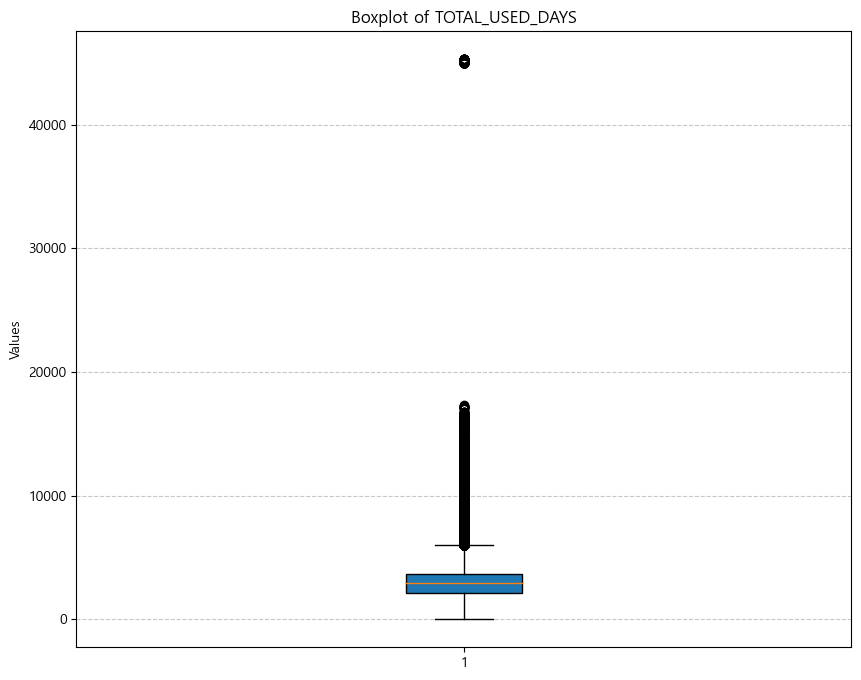

CJ헬로비전 시절 데이터부터 있다고 가정하겠습니다. <br><br>
CJ헬로비전이 인수된 2002년 11월 이후부터 2023년 12월까지의 기간을 기준으로 합니다. 이 기간은 약 7,700일에 해당합니다. <br><br>
그러나 7,600일 이상은 CJ헬로비전 이전 단계인 각 지역 케이블사의 데이터에 해당하며, 이는 2000년 이전의 데이터로 이어질 가능성이 높습니다.<br><br>따라서 7,600일을 데이터의 최대 기준으로 설정합니다.

이상치를 확인한 결과, 40,000일이라는 값이 존재합니다. 이를 기준으로 계산하면, 2023년 12월에서 40,000일을 거슬러 올라가면 약 1914년으로 연결됩니다.<br><br> 이는 현실적으로 서비스 데이터로 볼 수 없는 시간이므로, 데이터 오류나 비현실적인 값으로 판단됩니다.<br><br>
상한값인 5976보다는, 실질적인 값인 2002년 11월부터 계산.

우리의 프로젝트는 LG헬로비전 실무진들이 실제로 활용할 수 있는 대시보드 프로그램을 개발하는 것이 목적이기에, <BR><BR>
전처리 과정에서도 단순한 통계적 기준(ex: boxplot 등)이 아닌, 비즈니스적 관점을 반영하여 7,600일을 최대값으로 설정하고 데이터 전처리 작업을 진행!

In [23]:
ids_below_40000 = df.loc[df['TOTAL_USED_DAYS'] >= 40000, 'sha2_hash'].unique()

In [24]:
filter = df[df['sha2_hash'].isin(ids_below_40000)]

In [25]:
filter['sha2_hash'].value_counts()

sha2_hash
0204d71a51f74a70ce77f6b06e409787aaacea744e1de08f7dbbc55d924eaa4e    11
052a8816233fb71bd81ecd3f02a55169efae500f6fc37bcdbf9477482e684448    11
e3404be6fb696b0d1bfa734d615538fca3bfd06d0b88853693a62a2d83848773    11
dcff13914446bc80fa881d85cb2c7dcf6b4c4dfa4ec6c081208d619bd3657a5b    11
d4fe38edef5f1fedfa89a267231ea2586edf6048c477af9f69a8b1e426b899e4    11
d3aa0381a11a125309ea3ba6b55e84068bc86b47c5d3e1ed620e35ab5ae995d4    11
b8bdec34d9a76ca8b6c44b11056da78408023d70a5cb54531126adea1780eb9e    11
b12eb0b24ce64f0a855e7d0ce042964e6423a482f0b3aafd6aa5d69ad13951e8    11
ae218bdc62ec51cd6a2909ccf26cc9b616c32c78a2c32a3b156b5ae8320acc7b    11
a073e3af41f76e41fe6c0f8108a4acb3a7335d5259820ceeef79a1d1f08716d9    11
8d622fa72dc869550657f2eb88624d8e34fbea07510315704c4c7e3097fca041    11
8852bdf6f0cd2556c3d4cf2d27749bb4f39734f5f79ddd117a12f279132b0af8    11
72175c89f96faaa266edcec4ae24471c601f4784e40f626e3eca35849e5116ce    11
6fc82153c5b01ae854f5531a63e68fc1788c0c4ac360367f5d176cee9e95d72c   

In [27]:
df[df['sha2_hash'] == 'b7c5accef8e042c2f892fe44b7b4fd7085592e40a5ab33426b9c5468b916e0ea']

sha2_hash  \
16133615  b7c5accef8e042c2f892fe44b7b4fd7085592e40a5ab33426b9c5468b916e0ea   
16133616  b7c5accef8e042c2f892fe44b7b4fd7085592e40a5ab33426b9c5468b916e0ea   
16133617  b7c5accef8e042c2f892fe44b7b4fd7085592e40a5ab33426b9c5468b916e0ea   
16133618  b7c5accef8e042c2f892fe44b7b4fd7085592e40a5ab33426b9c5468b916e0ea   
16133619  b7c5accef8e042c2f892fe44b7b4fd7085592e40a5ab33426b9c5468b916e0ea   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
16133615       6개월~12개월미만           HD         베이직           N   
16133616       6개월~12개월미만           HD         베이직           N   
16133617      12개월~24개월미만           HD         베이직           N   
16133618      12개월~24개월미만           HD         베이직           N   
16133619      12개월~24개월미만           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
16133615                N           신규             N                0건   
16133616                N           신규             N                0건   
16133617                N           신규             N                0건   
16133618                N           신규             N                0건   
16133619                N           신규             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
16133615                1건             현장경로        60.0  약정만료전 12개월이상   
16133616                1건             현장경로        50.0  약정만료전 12개월이상   
16133617                1건             현장경로        50.0  약정만료전 12개월이상   
16133618                1건             현장경로        40.0  약정만료전 12개월이상   
16133619                1건             현장경로        30.0  약정만료전 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
16133615     20250408            44953         N               N   
16133616     20250408            44984         N               N   
16133617     20250408            45014         N               N   
16133618     20250408            45045         N               N   
16133619     20250408            45075         N               N   

         DIGITAL_ALOG_YN  TV_I_CNT CH_LAST_DAYS_BF_GRP VOC_TOTAL_MONTH1_YN  \
16133615               N      1.00                일주일내                   Y   
16133616               N      1.00                일주일내                   N   
16133617               N      1.00                일주일내                   N   
16133618               N      1.00                일주일내                   N   
16133619               N      1.00                2주일전                   Y   

         VOC_STOP_CANCEL_MONTH1_YN AGE_GRP10 EMAIL_RECV_CLS_NM  \
16133615                         N       60대                수신   
16133616                         N       60대                수신   
16133617                         N       60대                수신   
16133618                         N       60대                수신   
16133619                         Y       60대                수신   

         SMS_SEND_CLS_NM  CH_HH_AVG_MONTH1 CH_FAV_RNK1  KIDS_USE_PV_MONTH1  \
16133615              수신             13.57        KBS1                1.00   
16133616              수신             11.43         MBC                0.00   
16133617              수신             10.90        KBS2                0.00   
16133618              수신             10.84        KBS2                1.00   
16133619              수신              1.76          기타                0.00   

         NFX_USE_YN YTB_USE_YN    p_mt churn  CH_25_RATIO_1MONTH  
16133615          N          N  202302     N                2.46  
16133616          N          N  202303     N                1.74  
16133617          N          N  202304     N                2.65  
16133618          N          N  202305     N                3.14  
16133619          N          N  202306     Y                0.00

churn값이 Y인 고객은 데이터에서 매우 중요한 정보임! `0.4%`밖에 존재하지 않음! 그러므로 해당 정보들은 반드시 남겨두어야함<br><br>
TOTAL_USED_DAYS의 값이 40000이 넘는 유저들 중에서, 대부분의 유저들은 11번 중복으로 해지를 하지 않은 사람이고, <br><br>
hash값이 b7c5accef8e042c2f892fe44b7b4fd7085592e40a5ab33426b9c5468b916e0ea 고객은 churn 값이 Y로 확인되었으며, 이 고객의 데이터는 유지하도록 함<br><br>
반면, 40000일이 넘는 다른 유저들은 모두 churn값이 N이므로, 분석에 큰 영향을 미치지 않으므로 제거

In [28]:
filter[filter['churn'] == 'Y']

sha2_hash  \
16133619  b7c5accef8e042c2f892fe44b7b4fd7085592e40a5ab33426b9c5468b916e0ea   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
16133619      12개월~24개월미만           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
16133619                N           신규             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
16133619                1건             현장경로        30.0  약정만료전 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
16133619     20250408            45075         N               N   

         DIGITAL_ALOG_YN  TV_I_CNT CH_LAST_DAYS_BF_GRP VOC_TOTAL_MONTH1_YN  \
16133619               N      1.00                2주일전                   Y   

         VOC_STOP_CANCEL_MONTH1_YN AGE_GRP10 EMAIL_RECV_CLS_NM  \
16133619                         Y       60대                수신   

         SMS_SEND_CLS_NM  CH_HH_AVG_MONTH1 CH_FAV_RNK1  KIDS_USE_PV_MONTH1  \
16133619              수신              1.76          기타                0.00   

         NFX_USE_YN YTB_USE_YN    p_mt churn  CH_25_RATIO_1MONTH  
16133619          N          N  202306     Y                0.00

In [29]:
# sha2_hash의 value_counts 계산
id_counts = filter['sha2_hash'].value_counts()

# value_counts가 11인 sha2_hash를 추출
id_11_counts = id_counts[id_counts == 11].index

In [30]:
id_11_counts

Index(['0204d71a51f74a70ce77f6b06e409787aaacea744e1de08f7dbbc55d924eaa4e',
       '052a8816233fb71bd81ecd3f02a55169efae500f6fc37bcdbf9477482e684448',
       'e3404be6fb696b0d1bfa734d615538fca3bfd06d0b88853693a62a2d83848773',
       'dcff13914446bc80fa881d85cb2c7dcf6b4c4dfa4ec6c081208d619bd3657a5b',
       'd4fe38edef5f1fedfa89a267231ea2586edf6048c477af9f69a8b1e426b899e4',
       'd3aa0381a11a125309ea3ba6b55e84068bc86b47c5d3e1ed620e35ab5ae995d4',
       'b8bdec34d9a76ca8b6c44b11056da78408023d70a5cb54531126adea1780eb9e',
       'b12eb0b24ce64f0a855e7d0ce042964e6423a482f0b3aafd6aa5d69ad13951e8',
       'ae218bdc62ec51cd6a2909ccf26cc9b616c32c78a2c32a3b156b5ae8320acc7b',
       'a073e3af41f76e41fe6c0f8108a4acb3a7335d5259820ceeef79a1d1f08716d9',
       '8d622fa72dc869550657f2eb88624d8e34fbea07510315704c4c7e3097fca041',
       '8852bdf6f0cd2556c3d4cf2d27749bb4f39734f5f79ddd117a12f279132b0af8',
       '72175c89f96faaa266edcec4ae24471c601f4784e40f626e3eca35849e5116ce',
       '6fc82153c5b01ae85

In [31]:
# 원래 df에서 삭제
df = df[~df['sha2_hash'].isin(id_11_counts)]

In [32]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22467007  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22467008  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22467009  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22467010  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22467011  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0             12개월~24개월미만           HD        이코노미           N   
1            24개월~ 36개월미만           HD        이코노미           N   
2            24개월~ 36개월미만           HD        이코노미           N   
3            24개월~ 36개월미만           HD        이코노미           N   
4            24개월~ 36개월미만           HD        이코노미           N   
...                   ...          ...         ...         ...   
22467007          36개월 이상           HD         베이직           N   
22467008          36개월 이상           HD         베이직           N   
22467009          36개월 이상           HD         베이직           N   
22467010          36개월 이상           HD         베이직           N   
22467011          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22467007                N           신규             N                0건   
22467008                N           신규             N                0건   
22467009                N           신규             N                0건   
22467010                N           신규             N                0건   
22467011                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22467007                0건             현장경로        10.0  약정만료후 12개월이상   
22467008                0건             현장경로        10.0  약정만료후 12개월이상   
22467009                0건             현장경로        10.0  약정만료후 12개월이상   
22467010                0건             현장경로         0.0  약정만료후 12개월이상   
22467011                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
0            20240325              733         Y               Y   
1            20240325              764         Y               Y   
2            20240325              794         Y               Y   
3            20240325              825         Y               Y   
4            20240325              855         Y               Y   
...               ...              ...       ...             ...   
22467007     20200405             2338         N               N   
22467008     20200405    

7600일 이상 사용한 고객들은 데이터 상에서 이상치로 간주되지만, 매우 충성도가 높은 고객들임. <br><br>
따라서, 이들의 사용 일수는 최대 기준인 7600일로 조정하여 데이터에 반영 <br><br>
이렇게 함으로써 극단적인 값으로 인한 **분석 왜곡을 방지하면서도 충성 고객 데이터를 보존**할수있음!!<br><br>

In [33]:
filter_df = df[df['TOTAL_USED_DAYS'] > 7600]

In [34]:
filter_df

sha2_hash  \
77        00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
78        00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
79        00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
80        00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
81        00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
...                                                                    ...   
22445911  ffc26485840527fd0c4149e424f8e27a13d1b3d234c87b4832a8601a02eb99fd   
22453266  ffd810a430e98ce89a615ddf1df426c251982c6af978834179f4b7d0bc23b1b9   
22453267  ffd810a430e98ce89a615ddf1df426c251982c6af978834179f4b7d0bc23b1b9   
22453268  ffd810a430e98ce89a615ddf1df426c251982c6af978834179f4b7d0bc23b1b9   
22453269  ffd810a430e98ce89a615ddf1df426c251982c6af978834179f4b7d0bc23b1b9   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
77            12개월~24개월미만           HD        이코노미           N   
78            12개월~24개월미만           HD        이코노미           N   
79            12개월~24개월미만           HD        이코노미           N   
80            12개월~24개월미만           HD        이코노미           N   
81            12개월~24개월미만           HD        이코노미           N   
...                   ...          ...         ...         ...   
22445911      12개월~24개월미만           HD        이코노미           N   
22453266          36개월 이상           HD         베이직           N   
22453267          36개월 이상           HD         베이직           N   
22453268          36개월 이상           HD         베이직           N   
22453269          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
77                      N           신규             Y                0건   
78                      N           신규             Y                0건   
79                      N           신규             Y                0건   
80                      N           신규             Y                0건   
81                      N           신규             Y                0건   
...                   ...          ...           ...               ...   
22445911                N           신규             N                0건   
22453266                Y          재약정             N                0건   
22453267                Y          재약정             N                0건   
22453268                Y          재약정             N                0건   
22453269                Y          재약정             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
77                      0건             현장경로        알수없음  약정만료전 12개월이상   
78                      0건             현장경로        알수없음  약정만료전 12개월이상   
79                      0건             현장경로        알수없음  약정만료전 12개월이상   
80                      0건             현장경로        알수없음  약정만료전 12개월이상   
81                      0건             현장경로        알수없음  약정만료전 12개월이상   
...                    ...              ...         ...           ...   
22445911                0건             현장경로        50.0  약정만료전 12개월이상   
22453266                0건              O/B         0.0  약정만료전 12개월이상   
22453267                0건              O/B         0.0  약정만료전 12개월이상   
22453268                0건              O/B         0.0  약정만료전 9~12개월   
22453269                0건              O/B         0.0  약정만료전 9~12개월   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
77           20241007            11132         N               N   
78           20241007            11163         N               N   
79           20241007            11193         N               N   
80           20241007            11224         N               N   
81           20241007            11254         N               N   
...               ...              ...       ...             ...   
22445911     20250614             8242         N               N   
22453266     20241124    

TOTAL_USED_DAYS의 값은 점차 30, 31일씩 감소하는 데이터이기 때문에, 최대값 7600부터 -30씩 진행한다.

In [35]:
# ID별로 처리
result = pd.DataFrame()

for id_, group in filter_df.groupby("sha2_hash"):
    # p_mt 내림차순으로 정렬
    group = group.sort_values(by="p_mt", ascending=False)
    
    # 초기값 설정
    current_total_used = 7600
    
    # TOTAL_USED_DAYS 업데이트
    updated_group = group.copy()
    for idx in updated_group.index:
        updated_group.loc[idx, "TOTAL_USED_DAYS"] = current_total_used
        # TOTAL_USED_DAYS 를 30씩 감소, TOTAL_USED_DAYS는 p_mt 값이 올라갈수록 +30, +31이 됨
        current_total_used -= 30

    # 결과 합치기
    result = pd.concat([result, updated_group])

# 최종 결과, 원래 순서대로 정렬
result = result.sort_index()

In [37]:
result[['sha2_hash','TOTAL_USED_DAYS']]

sha2_hash  \
77        00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
78        00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
79        00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
80        00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
81        00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
...                                                                    ...   
22445911  ffc26485840527fd0c4149e424f8e27a13d1b3d234c87b4832a8601a02eb99fd   
22453266  ffd810a430e98ce89a615ddf1df426c251982c6af978834179f4b7d0bc23b1b9   
22453267  ffd810a430e98ce89a615ddf1df426c251982c6af978834179f4b7d0bc23b1b9   
22453268  ffd810a430e98ce89a615ddf1df426c251982c6af978834179f4b7d0bc23b1b9   
22453269  ffd810a430e98ce89a615ddf1df426c251982c6af978834179f4b7d0bc23b1b9   

          TOTAL_USED_DAYS  
77                   7300  
78                   7330  
79                   7360  
80                   7390  
81                   7420  
...                   ...  
22445911             7600  
22453266             7510  
22453267             7540  
22453268             7570  
22453269             7600  

[52302 rows x 2 columns]

In [39]:
result[result['sha2_hash'] == '00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee'][['sha2_hash','TOTAL_USED_DAYS']]

sha2_hash  \
77  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
78  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
79  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
80  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
81  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
82  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
83  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
84  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
85  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
86  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
87  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   

    TOTAL_USED_DAYS  
77             7300  
78             7330  
79             7360  
80             7390  
81             7420  
82             7450  
83             7480  
84             7510  
85             7540  
86             7570  
87             7600

In [40]:
# 원래 df에 result의 값을 반영
df.set_index(['sha2_hash', 'p_mt'], inplace=True)
result.set_index(['sha2_hash', 'p_mt'], inplace=True)

# result의 total_used를 원래 df에 반영
df.update(result[['TOTAL_USED_DAYS']])

# 인덱스 복원
df.reset_index(inplace=True)

In [41]:
df[df['sha2_hash'] == '00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee'][['sha2_hash','TOTAL_USED_DAYS']]

sha2_hash  \
77  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
78  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
79  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
80  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
81  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
82  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
83  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
84  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
85  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
86  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   
87  00002c6c7f3b6cca4f5fcaabfc7039242c688b56490ac46502f4da00edaf42ee   

    TOTAL_USED_DAYS  
77             7300  
78             7330  
79             7360  
80             7390  
81             7420  
82             7450  
83             7480  
84             7510  
85             7540  
86             7570  
87             7600

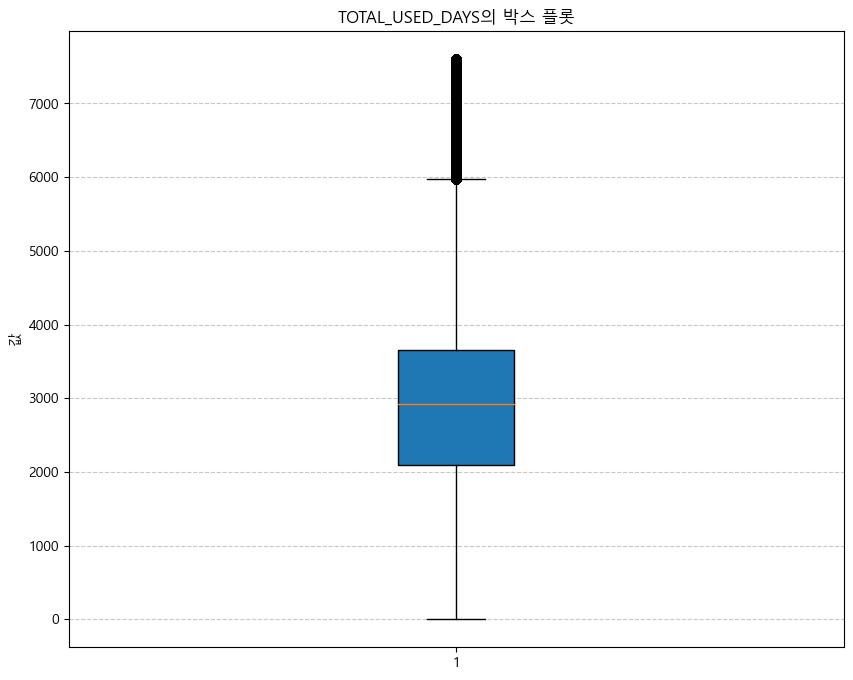

count   22466792.00
mean        2754.35
std         1181.57
min            0.00
25%         2096.00
50%         2920.00
75%         3648.00
max         7600.00
Name: TOTAL_USED_DAYS, dtype: float64

In [7]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['TOTAL_USED_DAYS'], patch_artist=True)
plt.title(f"TOTAL_USED_DAYS의 박스 플롯")
plt.ylabel("값")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

display(df['TOTAL_USED_DAYS'].describe())

In [44]:
df.to_csv("data/full_data/TPS_cancel_data_preprocessing5.csv", index=False)

---

In [5]:
df = pd.read_csv('data/full_data/TPS_cancel_data_preprocessing5.csv')

## KIDS_USE_PV_MONTH1

한 달 동안의 TV 키즈 채널의 진입 횟수가 1000번이나 2000번과 같은 값은 현실적으로 말이 되지 않은 것 같다. <BR><BR>
KIDS_USE_PV_MONTH1의 3사분위수도 0으로 나타나, 대부분의 고객이 키즈 채널을 이용하지 않았음을 보여준다. <BR><BR>
따라서, 이 값을 가정하여 전처리를 진행하기로 결정하였다.<BR><BR>
어린이집, 보육원 같은 곳을 생각해서 하루에 약 20번 정도 키즈 채널에 진입한다고 가정하면 한 달 최대 진입 횟수는 600번 정도가 적당하다고 판단된다. <br><br>
600번이 넘는 유저들의 평균 KIDS_USE_PV_MONTH1을 구해서, 600이 넘는 행에 해당 유저의 평균 KIDS_USE_PV_MONTH1을 대입해준다.

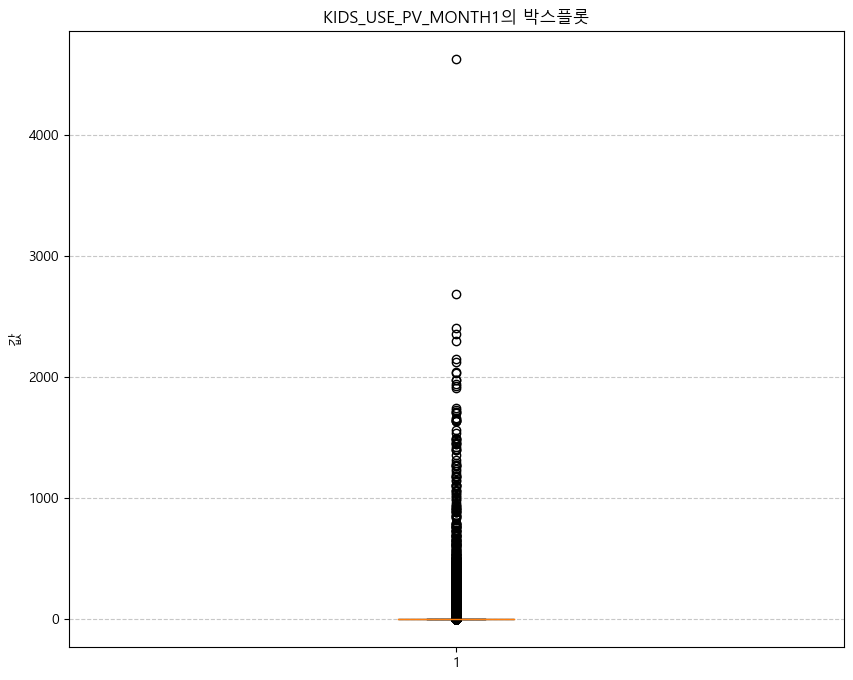

In [8]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['KIDS_USE_PV_MONTH1'], patch_artist=True)
plt.title(f"KIDS_USE_PV_MONTH1의 박스플롯")
plt.ylabel("값")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
df[df['KIDS_USE_PV_MONTH1'] >= 600]

sha2_hash  \
86538     01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
539497    06275feaad35254948164581842db69c60d7b26657ed7cdcf33ad1f8365c2f35   
539498    06275feaad35254948164581842db69c60d7b26657ed7cdcf33ad1f8365c2f35   
539499    06275feaad35254948164581842db69c60d7b26657ed7cdcf33ad1f8365c2f35   
539500    06275feaad35254948164581842db69c60d7b26657ed7cdcf33ad1f8365c2f35   
...                                                                    ...   
21618649  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618650  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618651  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618652  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618653  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
86538     202312          36개월 이상           HD        이코노미           N   
539497    202309          36개월 이상           HD        이코노미           N   
539498    202310          36개월 이상           HD        이코노미           N   
539499    202311          36개월 이상           HD        이코노미           N   
539500    202312          36개월 이상           HD        이코노미           N   
...          ...              ...          ...         ...         ...   
21618649  202308      12개월~24개월미만           HD         베이직           N   
21618650  202309      12개월~24개월미만           HD         베이직           N   
21618651  202310      12개월~24개월미만           HD         베이직           N   
21618652  202311      12개월~24개월미만           HD         베이직           N   
21618653  202312     24개월~ 36개월미만           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
86538                   Y          재약정             N                0건   
539497                  N          재약정             N                0건   
539498                  N          재약정             N                0건   
539499                  N          재약정             N                0건   
539500                  N          재약정             N                0건   
...                   ...          ...           ...               ...   
21618649                N           신규             N                0건   
21618650                N           신규             N                0건   
21618651                N           신규             N                0건   
21618652                N           신규             N                0건   
21618653                N           신규             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
86538                   0건             현장경로        10.0  약정만료전 9~12개월   
539497                  0건              O/B        50.0  약정만료전 12개월이상   
539498                  0건              O/B        50.0  약정만료전 12개월이상   
539499                  0건              O/B        50.0  약정만료전 9~12개월   
539500                  0건              O/B        50.0  약정만료전 9~12개월   
...                    ...              ...         ...           ...   
21618649                0건             현장경로        30.0  약정만료전 12개월이상   
21618650                0건             현장경로        알수없음  약정만료전 12개월이상   
21618651                0건             현장경로        40.0  약정만료전 12개월이상   
21618652                0건             현장경로        알수없음  약정만료전 12개월이상   
21618653                0건             현장경로        40.0  약정만료전 9~12개월   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
86538        20241031             4206         N               N   
539497       20241109             1702         Y               N   
539498       20241109             1733         Y               N   
539499       20241109             1763         Y               N   
539500       20241109             1794         Y               N   
...               ...              ...       ...             ... 

600번 넘는 유저 위주로 sha2_hash 빼내기

In [10]:
kids_id_over_600 = df.loc[df['KIDS_USE_PV_MONTH1'] >= 600, 'sha2_hash'].unique()

In [11]:
kids_id_over_600

array(['01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1',
       '06275feaad35254948164581842db69c60d7b26657ed7cdcf33ad1f8365c2f35',
       '0947051eb883eadb5e4539de761dba14d32c50c0df89aa255c061df1849886d8',
       '09d1d7e45fe42bc9689515cd7c08dce99ca8cc5cb816800118a5e5ec3ebb59a4',
       '0eca6c889b7231a8dc0abcf008c2b267b4afcdd76224d8240492b84503cb9c35',
       '10b290d11248e028c49725023401053f3d41d36c99487ae74f3481bb7c309fe0',
       '21ba8abf88b73f7649df37fdc1b19fda747c8006077e0182d327cbe9bec3b371',
       '27dc99ee0c639fc117b193f97300f47f8aa28b62437f583ddc4b995be383b3bb',
       '27eeb25af9bfdb23f91ab2e3cb04d618d367808f1abee2b96fd2793a432c9dbd',
       '2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11',
       '2def94590f5f97dcc7b59a07fc3383b2683c9a517afe7885d81cff6556128006',
       '2f9c8290a9c67360c340b058869bc6727dad454304ecc39bae3d63e803dc4896',
       '308c80cb1a712de4ef8c2b147a705eb5fbc4bbc0232d5bfd3e2af65799197e54',
       '350158b5118c1fd14

600번 넘는 유저 보기

In [12]:
filter_df = df[df['sha2_hash'].isin(kids_id_over_600)]

In [13]:
filter_df

sha2_hash  \
86528     01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86529     01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86530     01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86531     01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86532     01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
...                                                                    ...   
21618649  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618650  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618651  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618652  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618653  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
86528     202302          36개월 이상           HD        이코노미           N   
86529     202303          36개월 이상           HD        이코노미           N   
86530     202304          36개월 이상           HD        이코노미           N   
86531     202305          36개월 이상           HD        이코노미           N   
86532     202306          36개월 이상           HD        이코노미           N   
...          ...              ...          ...         ...         ...   
21618649  202308      12개월~24개월미만           HD         베이직           N   
21618650  202309      12개월~24개월미만           HD         베이직           N   
21618651  202310      12개월~24개월미만           HD         베이직           N   
21618652  202311      12개월~24개월미만           HD         베이직           N   
21618653  202312     24개월~ 36개월미만           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
86528                   Y          재약정             N                0건   
86529                   Y          재약정             N                0건   
86530                   Y          재약정             N                0건   
86531                   Y          재약정             N                0건   
86532                   Y          재약정             N                0건   
...                   ...          ...           ...               ...   
21618649                N           신규             N                0건   
21618650                N           신규             N                0건   
21618651                N           신규             N                0건   
21618652                N           신규             N                0건   
21618653                N           신규             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
86528                   0건             현장경로         0.0  약정만료전 12개월이상   
86529                   0건             현장경로         0.0  약정만료전 12개월이상   
86530                   0건             현장경로         0.0  약정만료전 12개월이상   
86531                   0건             현장경로         0.0  약정만료전 12개월이상   
86532                   0건             현장경로         0.0  약정만료전 12개월이상   
...                    ...              ...         ...           ...   
21618649                0건             현장경로        30.0  약정만료전 12개월이상   
21618650                0건             현장경로        알수없음  약정만료전 12개월이상   
21618651                0건             현장경로        40.0  약정만료전 12개월이상   
21618652                0건             현장경로        알수없음  약정만료전 12개월이상   
21618653                0건             현장경로        40.0  약정만료전 9~12개월   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
86528        20241031             3900         N               N   
86529        20241031             3931         N               N   
86530        20241031             3961         N               N   
86531        20241031             3992         N               N   
86532        20241031             4022         N               N   
...               ...              ...       ...             ... 

In [14]:
filter_df[filter_df['sha2_hash'] == '01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1']

sha2_hash  \
86528  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86529  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86530  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86531  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86532  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86533  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86534  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86535  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86536  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86537  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86538  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   

         p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
86528  202302          36개월 이상           HD        이코노미           N   
86529  202303          36개월 이상           HD        이코노미           N   
86530  202304          36개월 이상           HD        이코노미           N   
86531  202305          36개월 이상           HD        이코노미           N   
86532  202306          36개월 이상           HD        이코노미           N   
86533  202307          36개월 이상           HD        이코노미           N   
86534  202308          36개월 이상           HD        이코노미           N   
86535  202309          36개월 이상           HD        이코노미           N   
86536  202310          36개월 이상           HD        이코노미           N   
86537  202311          36개월 이상           HD        이코노미           N   
86538  202312          36개월 이상           HD        이코노미           N   

      PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
86528                Y          재약정             N                0건   
86529                Y          재약정             N                0건   
86530                Y          재약정             N                0건   
86531                Y          재약정             N                0건   
86532                Y          재약정             N                0건   
86533                Y          재약정             N                0건   
86534                Y          재약정             N                0건   
86535                Y          재약정             N                0건   
86536                Y          재약정             Y                0건   
86537                Y          재약정             Y                0건   
86538                Y          재약정             N                0건   

      PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
86528                0건             현장경로         0.0  약정만료전 12개월이상   
86529                0건             현장경로         0.0  약정만료전 12개월이상   
86530                0건             현장경로         0.0  약정만료전 12개월이상   
86531                0건             현장경로         0.0  약정만료전 12개월이상   
86532                0건             현장경로         0.0  약정만료전 12개월이상   
86533                0건             현장경로         0.0  약정만료전 12개월이상   
86534                0건             현장경로         0.0  약정만료전 12개월이상   
86535                0건             현장경로         0.0  약정만료전 12개월이상   
86536                0건             현장경로         0.0  약정만료전 12개월이상   
86537                0건             현장경로         0.0  약정만료전 9~12개월   
86538                0건             현장경로        10.0  약정만료전 9~12개월   

      AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN DIGITAL_ALOG_YN  \
86528     20241031             3900         N               N               N   
86529     20241031             3931         N               N               N   
86530     20241031             3961         N               N               N   
86531     20241031             3992         N               N               N   
86532     20241031             4022         N               N               N   
86533     20241031             4053         N               N               N   
86534     20241031             4084         N  

각 ID별 KIDS_USE_PV_MONTH1 평균 구하기

In [15]:
id_kids_mean = filter_df.groupby('sha2_hash')['KIDS_USE_PV_MONTH1'].mean()

In [16]:
id_kids_mean

sha2_hash
01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1     71.55
06275feaad35254948164581842db69c60d7b26657ed7cdcf33ad1f8365c2f35    433.91
0947051eb883eadb5e4539de761dba14d32c50c0df89aa255c061df1849886d8    232.00
09d1d7e45fe42bc9689515cd7c08dce99ca8cc5cb816800118a5e5ec3ebb59a4    508.00
0eca6c889b7231a8dc0abcf008c2b267b4afcdd76224d8240492b84503cb9c35    195.55
10b290d11248e028c49725023401053f3d41d36c99487ae74f3481bb7c309fe0    108.91
21ba8abf88b73f7649df37fdc1b19fda747c8006077e0182d327cbe9bec3b371    635.82
27dc99ee0c639fc117b193f97300f47f8aa28b62437f583ddc4b995be383b3bb    289.27
27eeb25af9bfdb23f91ab2e3cb04d618d367808f1abee2b96fd2793a432c9dbd    485.91
2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   1032.18
2def94590f5f97dcc7b59a07fc3383b2683c9a517afe7885d81cff6556128006    243.36
2f9c8290a9c67360c340b058869bc6727dad454304ecc39bae3d63e803dc4896    164.18
308c80cb1a712de4ef8c2b147a705eb5fbc4bbc0232d5bfd3e2af65799197e54    278.82
350158b5118c1fd

KIDS_USE_PV_MONTH1에서 600이 넘는 값이 있으면, 그 행에 있는 KIDS_USE_PV_MONTH1의 값을 평균으로 대체

In [17]:
filter_df.loc[filter_df['KIDS_USE_PV_MONTH1'] > 600, 'KIDS_USE_PV_MONTH1'] = filter_df.loc[filter_df['KIDS_USE_PV_MONTH1'] > 600, 'sha2_hash'].map(id_kids_mean)

In [18]:
filter_df

sha2_hash  \
86528     01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86529     01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86530     01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86531     01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86532     01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
...                                                                    ...   
21618649  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618650  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618651  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618652  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   
21618653  f65595c58929075690d08bb7187b4520aeb27ab7aa2ba6bf7e57b4e71c7e1bd6   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
86528     202302          36개월 이상           HD        이코노미           N   
86529     202303          36개월 이상           HD        이코노미           N   
86530     202304          36개월 이상           HD        이코노미           N   
86531     202305          36개월 이상           HD        이코노미           N   
86532     202306          36개월 이상           HD        이코노미           N   
...          ...              ...          ...         ...         ...   
21618649  202308      12개월~24개월미만           HD         베이직           N   
21618650  202309      12개월~24개월미만           HD         베이직           N   
21618651  202310      12개월~24개월미만           HD         베이직           N   
21618652  202311      12개월~24개월미만           HD         베이직           N   
21618653  202312     24개월~ 36개월미만           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
86528                   Y          재약정             N                0건   
86529                   Y          재약정             N                0건   
86530                   Y          재약정             N                0건   
86531                   Y          재약정             N                0건   
86532                   Y          재약정             N                0건   
...                   ...          ...           ...               ...   
21618649                N           신규             N                0건   
21618650                N           신규             N                0건   
21618651                N           신규             N                0건   
21618652                N           신규             N                0건   
21618653                N           신규             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
86528                   0건             현장경로         0.0  약정만료전 12개월이상   
86529                   0건             현장경로         0.0  약정만료전 12개월이상   
86530                   0건             현장경로         0.0  약정만료전 12개월이상   
86531                   0건             현장경로         0.0  약정만료전 12개월이상   
86532                   0건             현장경로         0.0  약정만료전 12개월이상   
...                    ...              ...         ...           ...   
21618649                0건             현장경로        30.0  약정만료전 12개월이상   
21618650                0건             현장경로        알수없음  약정만료전 12개월이상   
21618651                0건             현장경로        40.0  약정만료전 12개월이상   
21618652                0건             현장경로        알수없음  약정만료전 12개월이상   
21618653                0건             현장경로        40.0  약정만료전 9~12개월   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
86528        20241031             3900         N               N   
86529        20241031             3931         N               N   
86530        20241031             3961         N               N   
86531        20241031             3992         N               N   
86532        20241031             4022         N               N   
...               ...              ...       ...             ... 

In [20]:
filter_df[filter_df['sha2_hash'] == '01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1'][['sha2_hash','KIDS_USE_PV_MONTH1']]

sha2_hash  \
86528  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86529  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86530  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86531  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86532  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86533  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86534  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86535  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86536  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86537  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   
86538  01002612e7a71729a8d58b9a8319df974dee9f06ccd51870f6c4016eab900fe1   

       KIDS_USE_PV_MONTH1  
86528                0.00  
86529                0.00  
86530                0.00  
86531                0.00  
86532                8.00  
86533               12.00  
86534               10.00  
86535                0.00  
86536                0.00  
86537              150.00  
86538               71.55

In [21]:
# 소수점 나오는거 올림
filter_df['KIDS_USE_PV_MONTH1'] = np.ceil(filter_df['KIDS_USE_PV_MONTH1'])

In [23]:
# 변경된 KIDS_USE_PV_MONTH1을 df에 업데이트
df.set_index(['sha2_hash', 'p_mt'], inplace=True)
filter_df.set_index(['sha2_hash', 'p_mt'], inplace=True)

# KIDS_USE 컬럼만 업데이트
df.update(filter_df[['KIDS_USE_PV_MONTH1']])

# 인덱스 복원
df.reset_index(inplace=True)

#### 시각화

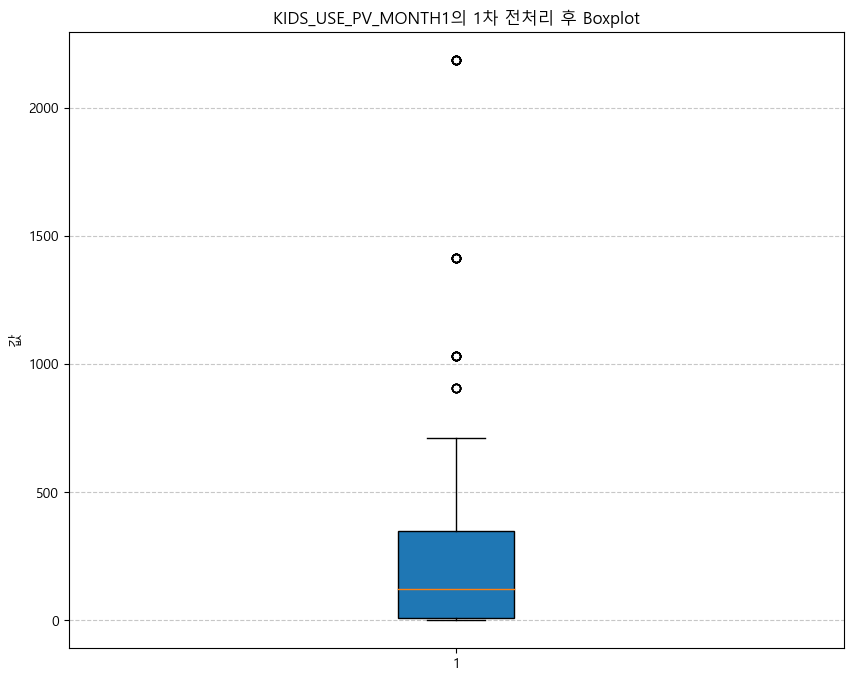

count    549.00
mean     261.34
std      398.60
min        0.00
25%        7.00
50%      124.00
75%      350.00
max     2187.00
Name: KIDS_USE_PV_MONTH1, dtype: float64

In [27]:
plt.figure(figsize=(10, 8))
plt.boxplot(filter_df['KIDS_USE_PV_MONTH1'], patch_artist=True)
plt.title(f"KIDS_USE_PV_MONTH1의 1차 전처리 후 Boxplot")
plt.ylabel("값")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

display(filter_df['KIDS_USE_PV_MONTH1'].describe())

평균으로 교체했기 때문에, 아직 600이 넘는 유저들이 존재함.
해당 유저들 위주로 확인해보자.

In [28]:
ids_with_kids_use_750 = df.loc[df['KIDS_USE_PV_MONTH1'] >= 750, 'sha2_hash'].unique()

In [29]:
ids_with_kids_use_750

array(['2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11',
       '543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3',
       '8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0',
       '99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d'],
      dtype=object)

In [30]:
filter_df = df[df['sha2_hash'].isin(ids_with_kids_use_750)]

In [31]:
filter_df

sha2_hash  \
3871683   2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   
3871684   2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   
3871685   2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   
3871686   2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   
3871687   2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   
3871688   2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   
3871689   2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   
3871690   2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   
3871691   2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   
3871692   2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   
3871693   2c2ad6895ad015f47fda877376b3883da31e81f5a6f12f26261bbaad9c240c11   
7390570   543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3   
7390571   543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3   
7390572   543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3   
7390573   543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3   
7390574   543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3   
7390575   543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3   
7390576   543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3   
7390577   543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3   
7390578   543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3   
7390579   543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3   
7390580   543d6be59a64bb7490db14d2cb5ee2c82130a6d9df0fde99201e3b76ba7697f3   
12307677  8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0   
12307678  8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0   
12307679  8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0   
12307680  8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0   
12307681  8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0   
12307682  8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0   
12307683  8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0   
12307684  8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0   
12307685  8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0   
12307686  8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0   
12307687  8c404f716f48111ac4dbd555c3b6606e3b8ecb278e8bfbbeedaa0de062043fd0   
13501211  99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d   
13501212  99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d   
13501213  99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d   
13501214  99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d   
13501215  99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d   
13501216  99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d   
13501217  99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d   
13501218  99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d   
13501219  99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d   
13501220  99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d   
13501221  99c4ed4c78be7e970014e10515185dcd5d4aa060a6b943f1172ccfcfeaf2b76d   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
3871683   202302          36개월 이상           HD        프리미엄           N   
3871684   202303          36개월 이상           HD        프리미엄           N   
3871685   202304          36개월 이상           HD        프리미엄           N   
3871686   202305          36개월 이상           HD        프리미엄           N   
3871687   202306          36개월 이상           HD        프리미엄           N   
3871688   202307          36개월 이상           HD        프리미엄           N   
3871689   202308          36개월 이상   

#### KIDS_USE_PV_MONTH1에서 750의 값을 넘는 유저들 중, churn의 값을 Y로 가진 행은 없기 때문에, 죄다 제거하기로 한다.

In [32]:
df = df[~df['sha2_hash'].isin(ids_with_kids_use_750)]

In [33]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22466787  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22466788  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22466789  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22466790  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22466791  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0         202302      12개월~24개월미만           HD        이코노미           N   
1         202303     24개월~ 36개월미만           HD        이코노미           N   
2         202304     24개월~ 36개월미만           HD        이코노미           N   
3         202305     24개월~ 36개월미만           HD        이코노미           N   
4         202306     24개월~ 36개월미만           HD        이코노미           N   
...          ...              ...          ...         ...         ...   
22466787  202308          36개월 이상           HD         베이직           N   
22466788  202309          36개월 이상           HD         베이직           N   
22466789  202310          36개월 이상           HD         베이직           N   
22466790  202311          36개월 이상           HD         베이직           N   
22466791  202312          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22466787                N           신규             N                0건   
22466788                N           신규             N                0건   
22466789                N           신규             N                0건   
22466790                N           신규             N                0건   
22466791                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22466787                0건             현장경로        10.0  약정만료후 12개월이상   
22466788                0건             현장경로        10.0  약정만료후 12개월이상   
22466789                0건             현장경로        10.0  약정만료후 12개월이상   
22466790                0건             현장경로         0.0  약정만료후 12개월이상   
22466791                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
0            20240325              733         Y               Y   
1            20240325              764         Y               Y   
2            20240325              794         Y               Y   
3            20240325              825         Y               Y   
4            20240325              855         Y               Y   
...               ...              ...       ...             ... 

TOTAL_USED_DAYS와 KIDS_USE_PV_MONTH1 진행

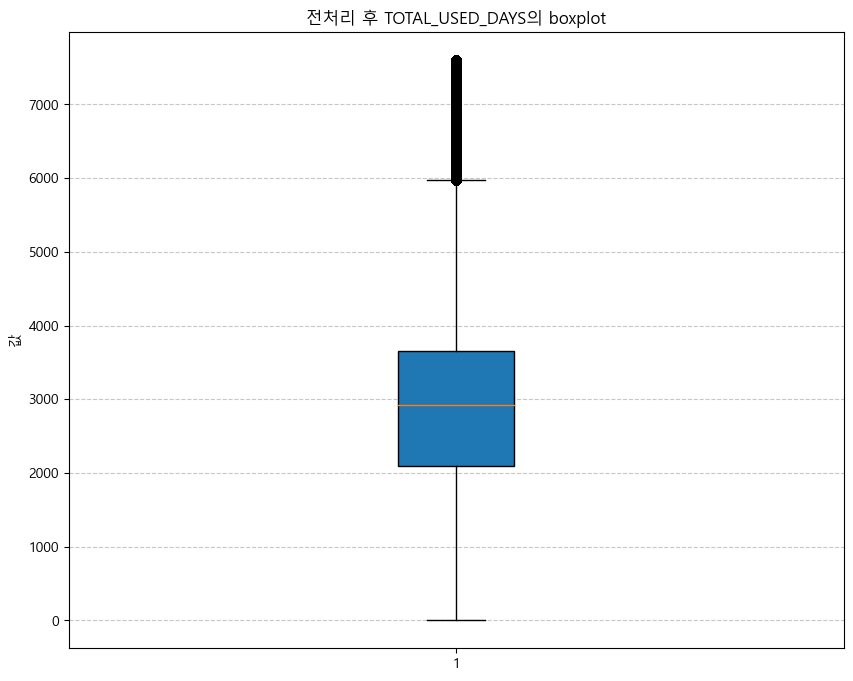

In [36]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['TOTAL_USED_DAYS'], patch_artist=True)
plt.title(f"전처리 후 TOTAL_USED_DAYS의 boxplot")
plt.ylabel("값")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

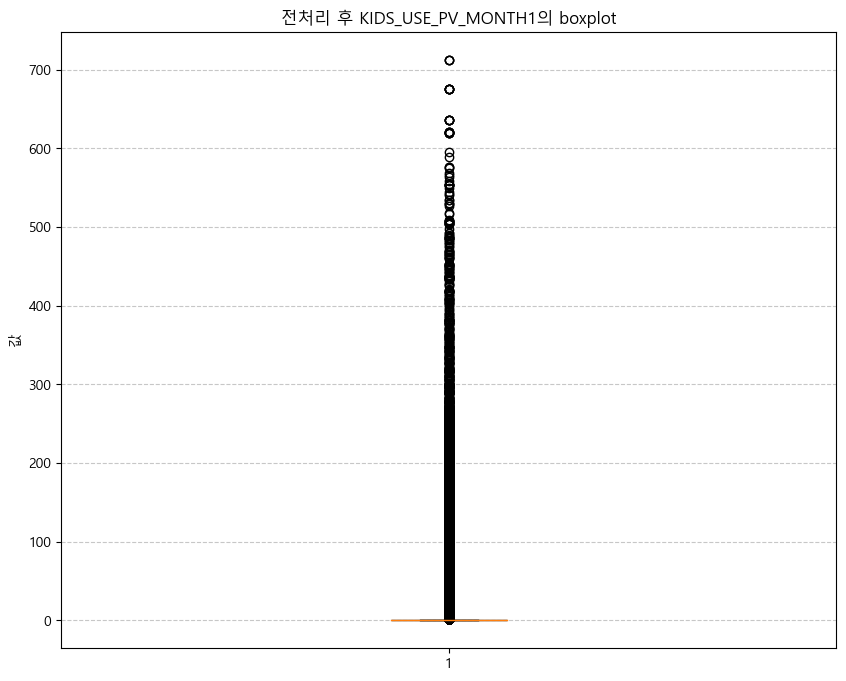

In [37]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['KIDS_USE_PV_MONTH1'], patch_artist=True)
plt.title(f"전처리 후 KIDS_USE_PV_MONTH1의 boxplot")
plt.ylabel("값")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---

## CH_HH_AVG_MONTH1
해당 컬럼은 '1개월 평균 채널 시청시간'을 의미한다.<br><br>
찜질방을 예로 들어도, 한 달 동안 매일 24시간 내내 시청한다고 가정해도, 하루 평균 시청 시간은 최대 24시간이 됨.<br><br>
다른 경우에도, 어르신들이 TV만 끄고 셋톱박스를 켜논 상태로 24시간 내내 시청하신다고 가정해도, 하루 평균 시청 시간은 24시간이 되어야함. <br><br>
따라서, 이 컬럼에서 평균 시청 시간이 24를 초과하는 70개의 행은 데이터의 현실성을 보장하기 위해 최대값인 24로 변경한다.

In [39]:
df[df['CH_HH_AVG_MONTH1'] >= 24.0][['sha2_hash','CH_HH_AVG_MONTH1']]

sha2_hash  \
556411    0658a2fdd4ead9dd37ad6f50ab50579382d4eaafa4f2d5d9f28ee5c536ba722e   
770029    08c853fc22278c2599f830b91755d0bd4165294d61c8bc322298b2ab2a798c84   
787754    08fb681ea867ec506f437e3cd73c2a7877e36e2befb92cbc9221117d9de39b7b   
1037876   0bd410a5e68d43dac7e45fea60cec1b7f7906aebdb6abf2b49be3cfe1628502d   
1266895   0e77ebb0e8a1fb5409728021acda8a9bea2ca9f9890ea56fcee25d74dca34ebb   
...                                                                    ...   
21055101  efe3b53d65071c0713a7b5afe7041cd1abe994b46702754a4879060c332febb7   
21331344  f30b7d8ed5ff9152d2ed4b97432c0dae04913cac3f4ea5b04e394729bccb74d8   
21484693  f4c86d44436162a196109cc4f9b86ba04d80afb9d7acb937280fb0a86c83674a   
22043662  fb26f1bff7055d6455fec12db89c087dc597e66182dc24799777dc3783df3228   
22299577  fe1539952ee7c5fb2a4adc7448cfd7e4b09211ba670c9d3ad6c360ca483e7c73   

          CH_HH_AVG_MONTH1  
556411               25.00  
770029               29.63  
787754               24.17  
1037876              26.56  
1266895              26.89  
...                    ...  
21055101             27.98  
21331344             28.85  
21484693             30.33  
22043662             30.27  
22299577             35.39  

[70 rows x 2 columns]

In [40]:
df.loc[df['CH_HH_AVG_MONTH1'] >= 24.0, 'CH_HH_AVG_MONTH1'] = 24.0

In [41]:
df[df['CH_HH_AVG_MONTH1'] > 24.0]

Empty DataFrame
Columns: [sha2_hash, p_mt, SVC_USE_DAYS_GRP, MEDIA_NM_GRP, PROD_NM_GRP, PROD_OLD_YN, PROD_ONE_PLUS_YN, AGMT_KIND_NM, STB_RES_1M_YN, SVOD_SCRB_CNT_GRP, PAID_CHNL_CNT_GRP, SCRB_PATH_NM_GRP, INHOME_RATE, AGMT_END_SEG, AGMT_END_YMD, TOTAL_USED_DAYS, BUNDLE_YN, DIGITAL_GIGA_YN, DIGITAL_ALOG_YN, TV_I_CNT, CH_LAST_DAYS_BF_GRP, VOC_TOTAL_MONTH1_YN, VOC_STOP_CANCEL_MONTH1_YN, AGE_GRP10, EMAIL_RECV_CLS_NM, SMS_SEND_CLS_NM, CH_HH_AVG_MONTH1, CH_FAV_RNK1, KIDS_USE_PV_MONTH1, NFX_USE_YN, YTB_USE_YN, churn, CH_25_RATIO_1MONTH]
Index: []

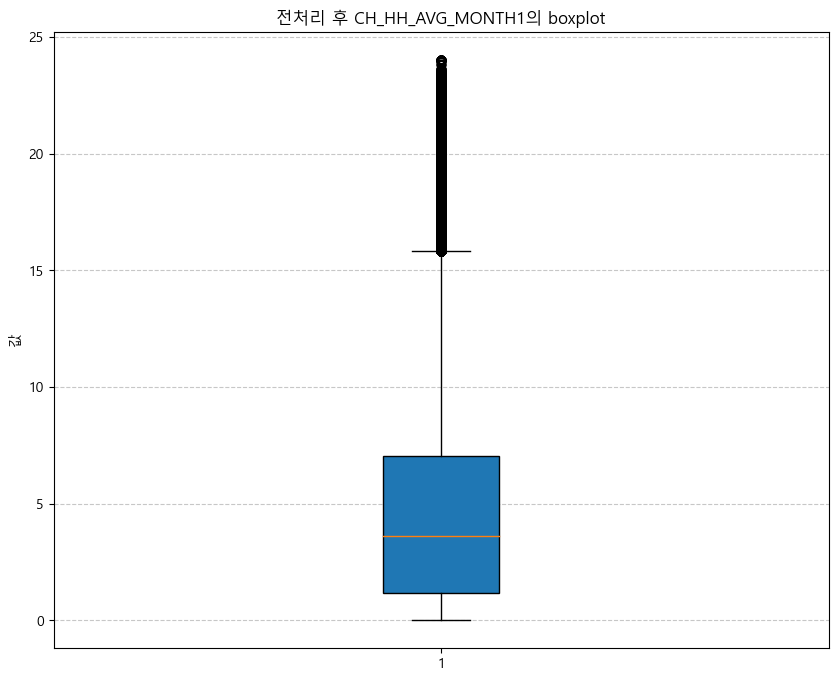

In [42]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['CH_HH_AVG_MONTH1'], patch_artist=True)
plt.title(f"전처리 후 CH_HH_AVG_MONTH1의 boxplot")
plt.ylabel("값")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---

## TV_I_CNT (일반 고객 vs 우량 고객)

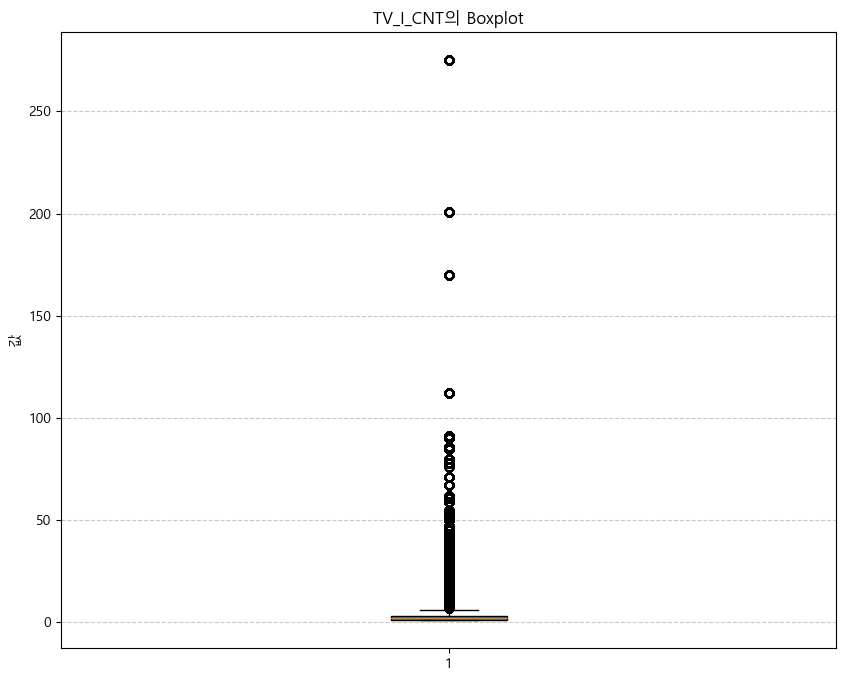

In [43]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['TV_I_CNT'], patch_artist=True)
plt.title(f"TV_I_CNT의 Boxplot")
plt.ylabel("값")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

100대 이상의 기기를 사용하는 고객들의 주요 특징은 유치 경로가 현장 경로 또는 임직원인 경우가 대다수임.<br><br>
이는 해당 고객들이 주로 기업, 호텔, 병원, 모텔 등과 같은 상업적 환경에서 서비스를 활용하기 때문으로 보이며, 이러한 이유로 기기 사용량이 매우 많은 것으로 판단됨.

우량 고객 특징 봐보자 (100대 이용 고객)<br><br>

In [44]:
tv_i_over_100_id = df.loc[df['TV_I_CNT'] >= 100, 'sha2_hash'].unique()
tviover100 = df[df['sha2_hash'].isin(tv_i_over_100_id)]
tviover100

sha2_hash  \
21983     00408c220e84236a977ddb2adc377c13b66fc8fd74b1fb832b98d7b4f297eed2   
21984     00408c220e84236a977ddb2adc377c13b66fc8fd74b1fb832b98d7b4f297eed2   
21985     00408c220e84236a977ddb2adc377c13b66fc8fd74b1fb832b98d7b4f297eed2   
21986     00408c220e84236a977ddb2adc377c13b66fc8fd74b1fb832b98d7b4f297eed2   
21987     00408c220e84236a977ddb2adc377c13b66fc8fd74b1fb832b98d7b4f297eed2   
...                                                                    ...   
22459170  ffea44e53a2f1562a5556c617189fedb0f9f61336626412907e6c9234aca3636   
22459171  ffea44e53a2f1562a5556c617189fedb0f9f61336626412907e6c9234aca3636   
22459172  ffea44e53a2f1562a5556c617189fedb0f9f61336626412907e6c9234aca3636   
22459173  ffea44e53a2f1562a5556c617189fedb0f9f61336626412907e6c9234aca3636   
22459174  ffea44e53a2f1562a5556c617189fedb0f9f61336626412907e6c9234aca3636   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
21983     202302     24개월~ 36개월미만          UHD         베이직           N   
21984     202303     24개월~ 36개월미만          UHD         베이직           N   
21985     202304     24개월~ 36개월미만          UHD         베이직           N   
21986     202305     24개월~ 36개월미만          UHD         베이직           N   
21987     202306     24개월~ 36개월미만          UHD         베이직           N   
...          ...              ...          ...         ...         ...   
22459170  202308          36개월 이상           HD        프리미엄           N   
22459171  202309          36개월 이상           HD        프리미엄           N   
22459172  202310          36개월 이상           HD        프리미엄           N   
22459173  202311          36개월 이상           HD        프리미엄           N   
22459174  202312          36개월 이상           HD        프리미엄           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
21983                   N           신규             N                2건   
21984                   N           신규             N                2건   
21985                   N           신규             N                2건   
21986                   N           신규             N                2건   
21987                   N           신규             N                2건   
...                   ...          ...           ...               ...   
22459170                N           신규             N                1건   
22459171                N           신규             N                1건   
22459172                N           신규             Y                1건   
22459173                N           신규             Y                1건   
22459174                N           신규             Y                1건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
21983                3건 이상              임직원        40.0      약정만료 1개월   
21984                3건 이상              임직원        40.0      약정만료 1개월   
21985                3건 이상              임직원        40.0      약정만료 1개월   
21986                3건 이상              임직원        40.0      약정만료 1개월   
21987                3건 이상              임직원        30.0      약정만료 1개월   
...                    ...              ...         ...           ...   
22459170                0건              임직원        알수없음  약정만료후 12개월이상   
22459171                0건              임직원        알수없음  약정만료후 12개월이상   
22459172                0건              임직원        알수없음  약정만료후 12개월이상   
22459173                0건              임직원        알수없음  약정만료후 12개월이상   
22459174                0건              임직원        알수없음  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
21983             무약정             3920         Y               N   
21984             무약정             3951         Y               N   
21985             무약정             3981         Y               N   
21986             무약정             4012         Y               N   
21987             무약정             4042         Y               N   
...               ...              ...       ...             ... 

In [45]:
tviover100 = tviover100.sort_values(by=['TV_I_CNT', 'sha2_hash'], ascending=[True, True])[['sha2_hash','MEDIA_NM_GRP','PROD_NM_GRP','SCRB_PATH_NM_GRP','TV_I_CNT','AGE_GRP10']]

In [46]:
tviover100.to_csv("data/check.csv", index=False)

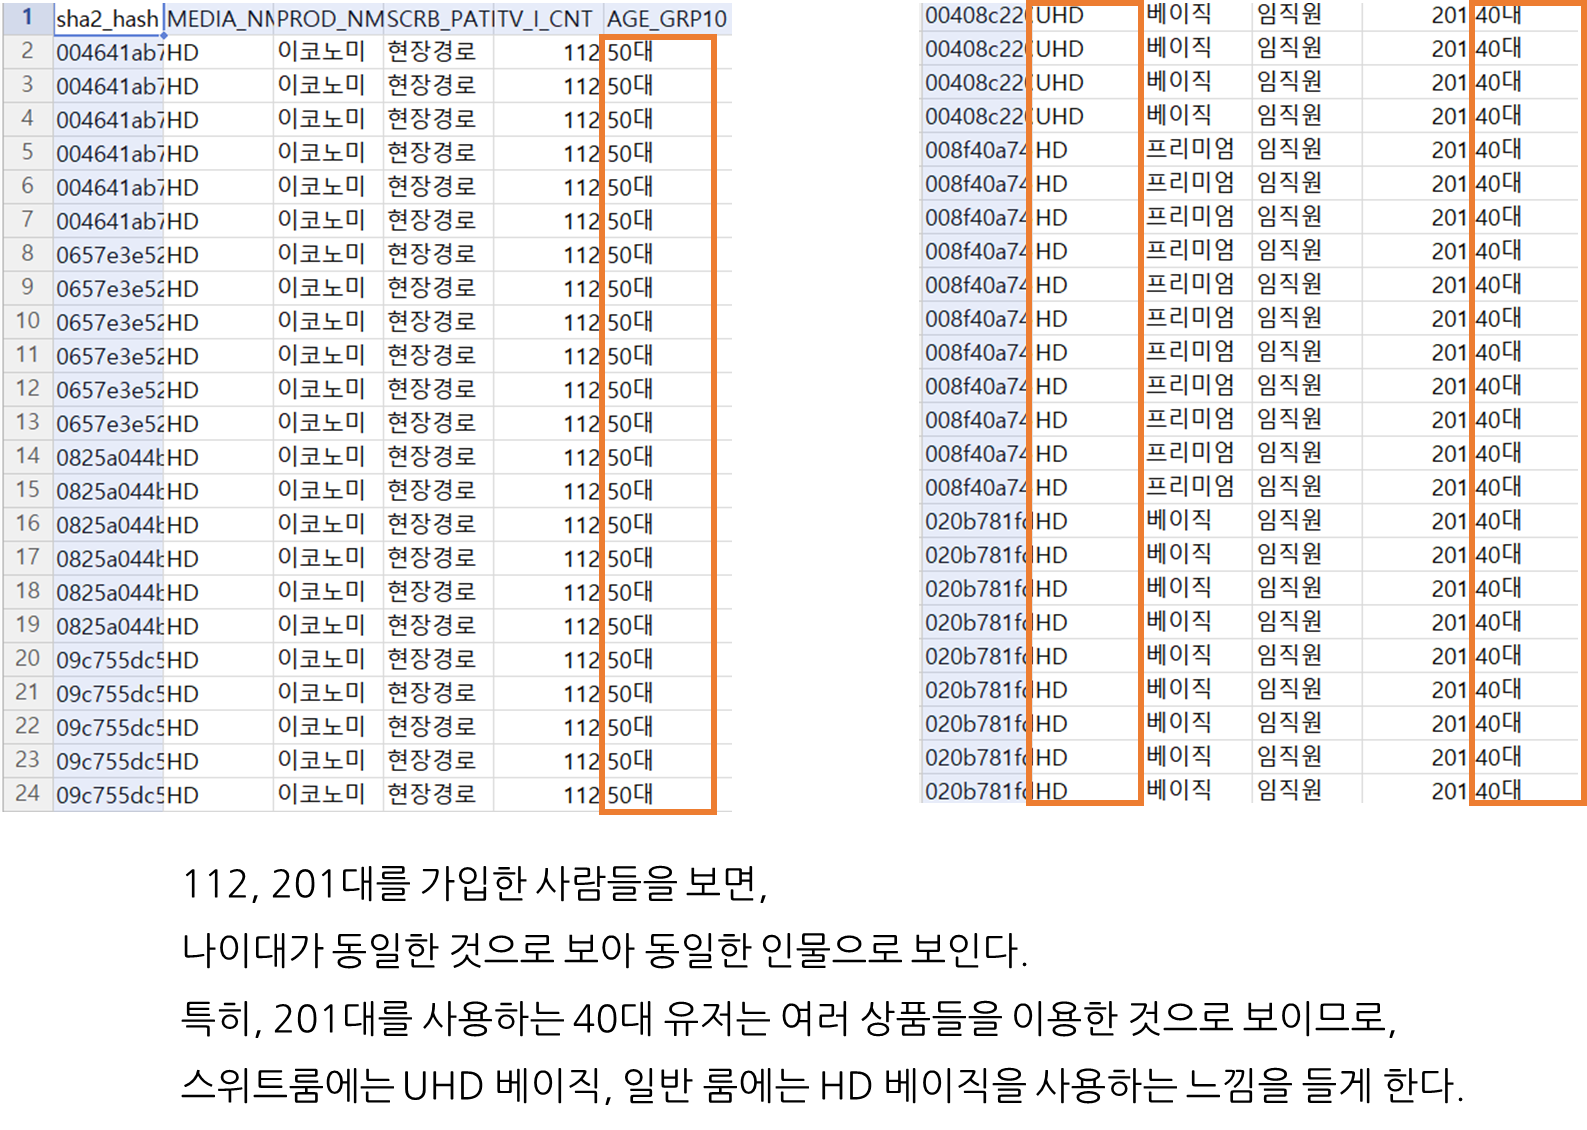

(다크모드 유저를 위해)<br><br>
112,201대를 가입한 사람들을 보면, 나이대가 동일한 것으로 보아 동일한 인물으로 보인다.<br><br>
특히, 201대를 사용하는 40대 고객은 여러 상품들을 이용한 것으로 보이며, `스위트룸에는 UHD 베이직, 일반 룸에는 HD 베이직`을 사용하는 것 같다.

그럼 50대 이상도 확인해보자

In [47]:
tv_i_over_50_id = df.loc[df['TV_I_CNT'] >= 50, 'sha2_hash'].unique()
tviover50 = df[df['sha2_hash'].isin(tv_i_over_50_id)]

In [48]:
tviover50 = tviover50.sort_values(by=['TV_I_CNT','AGE_GRP10'], ascending=[True, True])[['sha2_hash','MEDIA_NM_GRP','PROD_NM_GRP','SCRB_PATH_NM_GRP','TV_I_CNT','AGE_GRP10']]

In [49]:
tviover50

sha2_hash  \
11433356  8245990c773cec08c3bf038cb95c306081248081c1b560f83b29d388c4331d19   
11433357  8245990c773cec08c3bf038cb95c306081248081c1b560f83b29d388c4331d19   
11433358  8245990c773cec08c3bf038cb95c306081248081c1b560f83b29d388c4331d19   
15779922  b3bb6efbae56f476e3aaafce00c6429184ded0cbbbc4891bbc41019a1802f4ba   
15779923  b3bb6efbae56f476e3aaafce00c6429184ded0cbbbc4891bbc41019a1802f4ba   
...                                                                    ...   
22260565  fda4aa0bbc8284379bff8b5e6ba010003d9058eb674b33fb66897c989676ce76   
22284817  fdea94878fdbc04c86ab93e868e6b2224e5a05250a112cce14de7180da14a13c   
22284818  fdea94878fdbc04c86ab93e868e6b2224e5a05250a112cce14de7180da14a13c   
22431804  ff98be419f4f300a616f18abdb8197f277faef3052555c1891c821bfb08d5df0   
22431805  ff98be419f4f300a616f18abdb8197f277faef3052555c1891c821bfb08d5df0   

         MEDIA_NM_GRP PROD_NM_GRP SCRB_PATH_NM_GRP  TV_I_CNT AGE_GRP10  
11433356           HD        이코노미              O/B      2.00       60대  
11433357           HD        이코노미              O/B      2.00       60대  
11433358           HD        이코노미              O/B      2.00       60대  
15779922           HD        프리미엄              O/B      2.00       60대  
15779923           HD        프리미엄              O/B      2.00       60대  
...               ...         ...              ...       ...       ...  
22260565           HD         베이직             현장경로    275.00       70대  
22284817           HD        이코노미             현장경로    275.00       70대  
22284818           HD        이코노미             현장경로    275.00       70대  
22431804           HD         베이직             현장경로    275.00       70대  
22431805           HD         베이직             현장경로    275.00       70대  

[11871 rows x 6 columns]

In [50]:
tviover50.to_csv("data/check.csv", index=False)

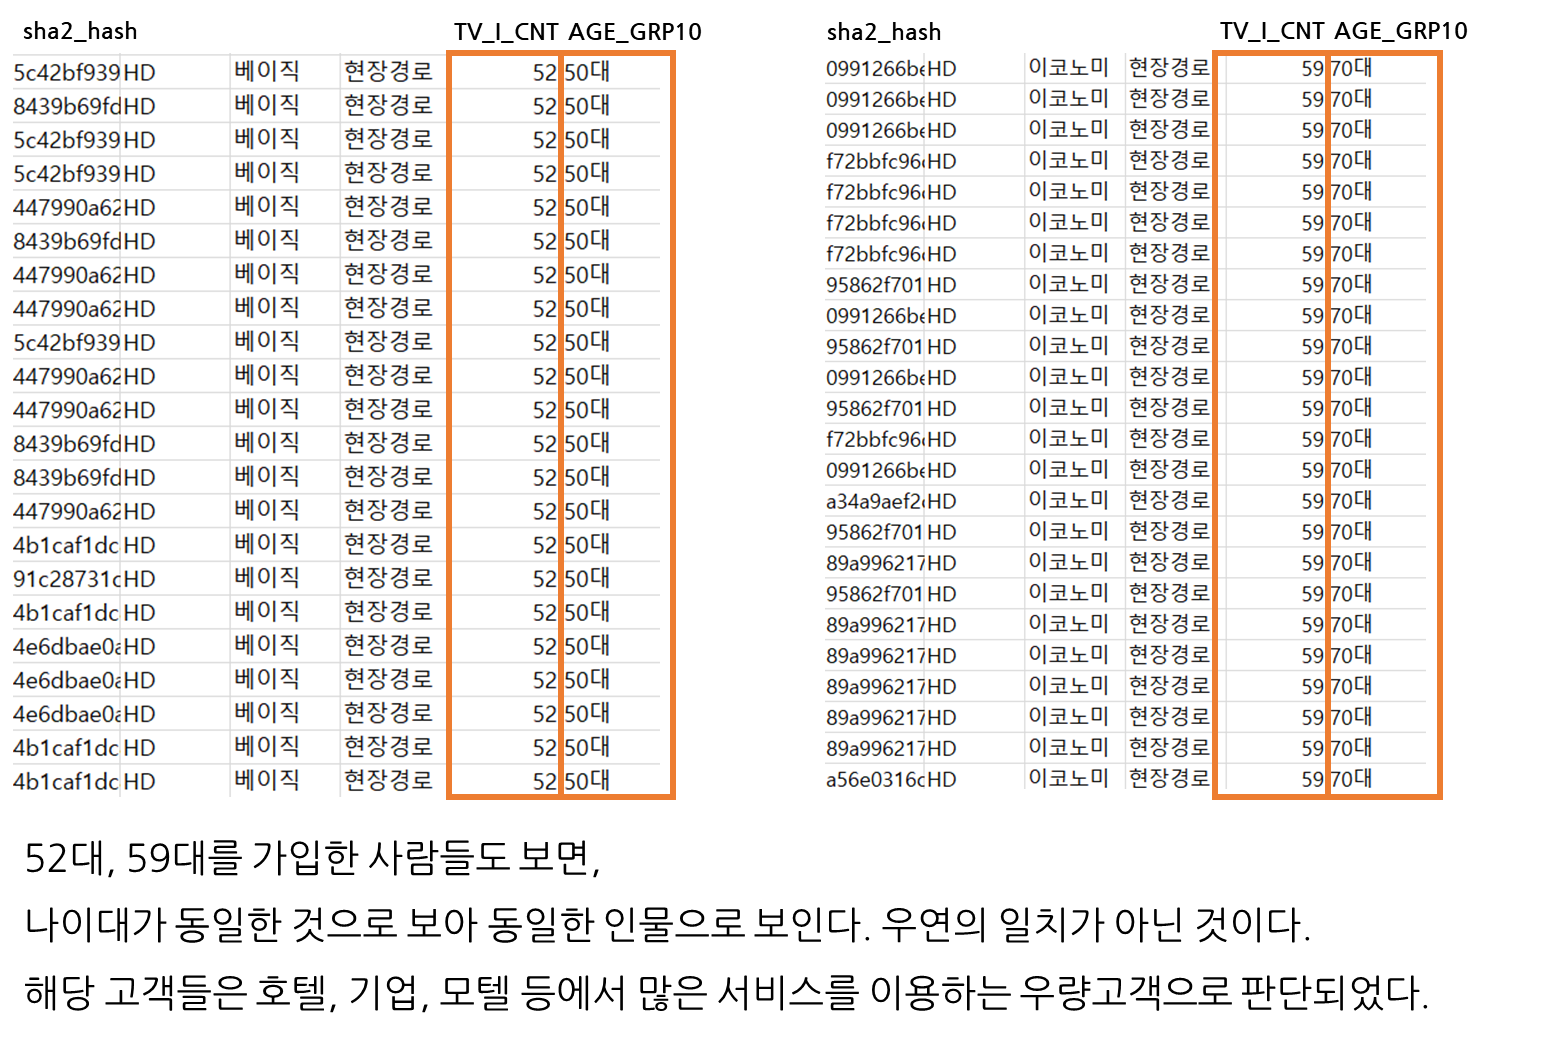

(다크모드 유저를 위해)<br><br>
52대, 59대를 가입한 사람들도 보면, 나이대가 동일한 것으로 보아 동일한 인물임을 유추할 수 있다.<br><br>
해당 고객들은 호텔, 기업, 모텔 등에서 많은 서비스를 이용하는 우량고객으로 판단된다.

그럼 20대 이상 사용하는 사람들 우량고객인지?

In [51]:
tv_i_over_20_id = df.loc[df['TV_I_CNT'] >= 20, 'sha2_hash'].unique()
tviover20 = df[df['sha2_hash'].isin(tv_i_over_20_id)]
tviover20

sha2_hash  \
6254      001150c9c36708d5f6193093ccc5ec1867846103be30aaa196c320837a5e0c33   
6255      001150c9c36708d5f6193093ccc5ec1867846103be30aaa196c320837a5e0c33   
6256      001150c9c36708d5f6193093ccc5ec1867846103be30aaa196c320837a5e0c33   
8334      0016f706678f7a4538cbdda538fce73f2c5a2b14fea6b71d1bc8fc87771fd0e6   
8335      0016f706678f7a4538cbdda538fce73f2c5a2b14fea6b71d1bc8fc87771fd0e6   
...                                                                    ...   
22465447  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465448  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465449  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465450  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465451  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
6254      202310            6개월미만           HD        이코노미           N   
6255      202311            6개월미만           HD        이코노미           N   
6256      202312       6개월~12개월미만           HD        이코노미           N   
8334      202302          36개월 이상           HD         베이직           N   
8335      202303          36개월 이상           HD         베이직           N   
...          ...              ...          ...         ...         ...   
22465447  202308     24개월~ 36개월미만           HD        이코노미           N   
22465448  202309     24개월~ 36개월미만           HD        이코노미           N   
22465449  202310     24개월~ 36개월미만           HD        이코노미           N   
22465450  202311     24개월~ 36개월미만           HD        이코노미           N   
22465451  202312     24개월~ 36개월미만           HD        이코노미           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
6254                    N           신규             N                0건   
6255                    N           신규             N                0건   
6256                    N           신규             N                0건   
8334                    N          재약정             N                0건   
8335                    N          재약정             N                0건   
...                   ...          ...           ...               ...   
22465447                N           신규             N                0건   
22465448                N           신규             N                0건   
22465449                N           신규             N                0건   
22465450                N           신규             N                0건   
22465451                N           신규             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
6254                    0건             현장경로        10.0  약정만료전 12개월이상   
6255                    0건             현장경로        10.0  약정만료전 12개월이상   
6256                    0건             현장경로        10.0  약정만료전 12개월이상   
8334                    0건              임직원        10.0  약정만료전 12개월이상   
8335                    0건              임직원        10.0  약정만료전 12개월이상   
...                    ...              ...         ...           ...   
22465447                0건             현장경로         0.0  약정만료전 9~12개월   
22465448                0건             현장경로         0.0   약정만료전 6~9개월   
22465449                0건             현장경로         0.0   약정만료전 6~9개월   
22465450                0건             현장경로         0.0   약정만료전 6~9개월   
22465451                0건             현장경로         0.0   약정만료전 3~6개월   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
6254         20260627             2443         Y               N   
6255         20260627             2473         Y               N   
6256         20260627             2504         Y               N   
8334         20240405             2937         Y               N   
8335         20240405             2968         Y               N   
...               ...              ...       ...             ... 

In [52]:
tviover20 = tviover20.sort_values(by=['TV_I_CNT','AGE_GRP10'], ascending=[True, True])[['sha2_hash','MEDIA_NM_GRP','PROD_NM_GRP','SCRB_PATH_NM_GRP','TV_I_CNT','AGE_GRP10']]

In [53]:
tviover20.to_csv("data/check.csv", index=False)

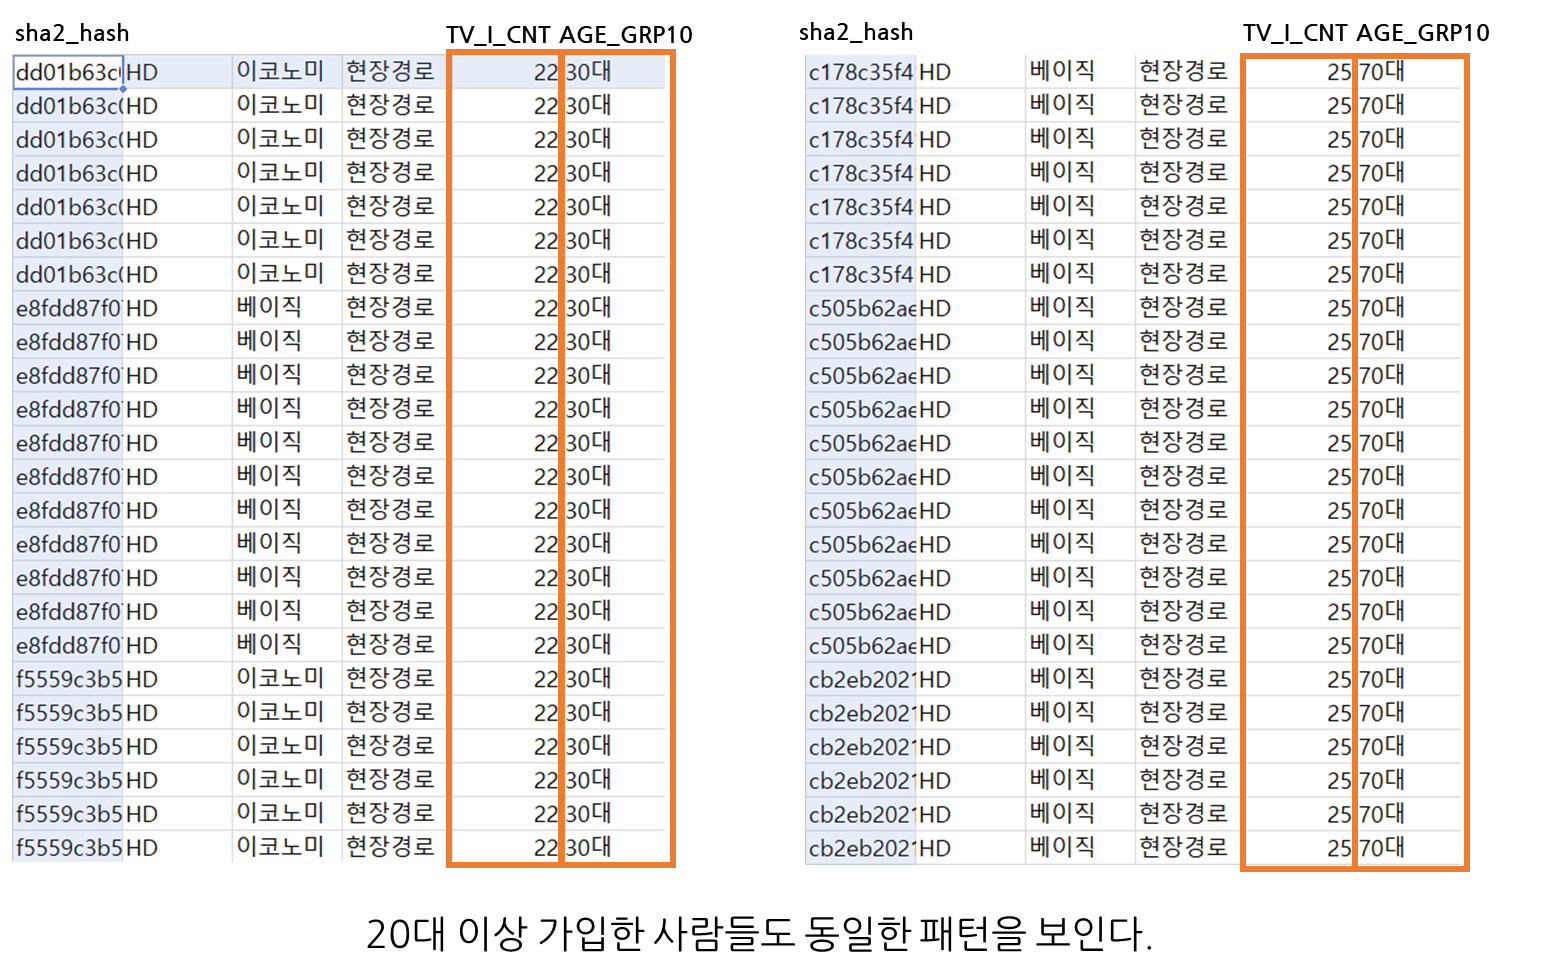

(다크모드 유저를 위해)<BR><BR>
20대 이상 가입한 사람들도 동일한 패턴을 보인다.

그러면 TV_I_CNT의 상한값인 7 이상 위주로 봐보자.

In [57]:
tv_i_over_7_id = df.loc[df['TV_I_CNT'] >= 7, 'sha2_hash'].unique()
tviover7 = df[df['sha2_hash'].isin(tv_i_over_7_id)]
tviover7

sha2_hash  \
440       00014e00569841a8546a617705f8c8134a9a68e5fade029253f09cc62820dbd0   
441       00014e00569841a8546a617705f8c8134a9a68e5fade029253f09cc62820dbd0   
442       00014e00569841a8546a617705f8c8134a9a68e5fade029253f09cc62820dbd0   
443       00014e00569841a8546a617705f8c8134a9a68e5fade029253f09cc62820dbd0   
444       00014e00569841a8546a617705f8c8134a9a68e5fade029253f09cc62820dbd0   
...                                                                    ...   
22465447  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465448  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465449  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465450  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465451  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
440       202302          36개월 이상           HD         베이직           N   
441       202303          36개월 이상           HD         베이직           N   
442       202304          36개월 이상           HD         베이직           N   
443       202305          36개월 이상           HD         베이직           N   
444       202306          36개월 이상           HD         베이직           N   
...          ...              ...          ...         ...         ...   
22465447  202308     24개월~ 36개월미만           HD        이코노미           N   
22465448  202309     24개월~ 36개월미만           HD        이코노미           N   
22465449  202310     24개월~ 36개월미만           HD        이코노미           N   
22465450  202311     24개월~ 36개월미만           HD        이코노미           N   
22465451  202312     24개월~ 36개월미만           HD        이코노미           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
440                     N          재약정             N                0건   
441                     N          재약정             N                0건   
442                     N          재약정             N                0건   
443                     N          재약정             N                0건   
444                     N          재약정             N                0건   
...                   ...          ...           ...               ...   
22465447                N           신규             N                0건   
22465448                N           신규             N                0건   
22465449                N           신규             N                0건   
22465450                N           신규             N                0건   
22465451                N           신규             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
440                     1건              I/B        50.0  약정만료전 12개월이상   
441                     0건              I/B        40.0  약정만료전 12개월이상   
442                     0건              I/B        40.0  약정만료전 12개월이상   
443                     0건              I/B        40.0  약정만료전 12개월이상   
444                     0건              I/B        40.0  약정만료전 12개월이상   
...                    ...              ...         ...           ...   
22465447                0건             현장경로         0.0  약정만료전 9~12개월   
22465448                0건             현장경로         0.0   약정만료전 6~9개월   
22465449                0건             현장경로         0.0   약정만료전 6~9개월   
22465450                0건             현장경로         0.0   약정만료전 6~9개월   
22465451                0건             현장경로         0.0   약정만료전 3~6개월   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
440          20240804             2916         Y               Y   
441          20240804             2947         Y               Y   
442          20240804             2977         Y               Y   
443          20240804             3008         Y               Y   
444          20240804             3038         Y               Y   
...               ...              ...       ...             ... 

In [58]:
tviover7 = tviover7.sort_values(by=['TV_I_CNT','AGE_GRP10'], ascending=[True, True])[['sha2_hash','MEDIA_NM_GRP','PROD_NM_GRP','SCRB_PATH_NM_GRP','TV_I_CNT','AGE_GRP10']]

In [59]:
tviover7.to_csv("data/check.csv", index=False)

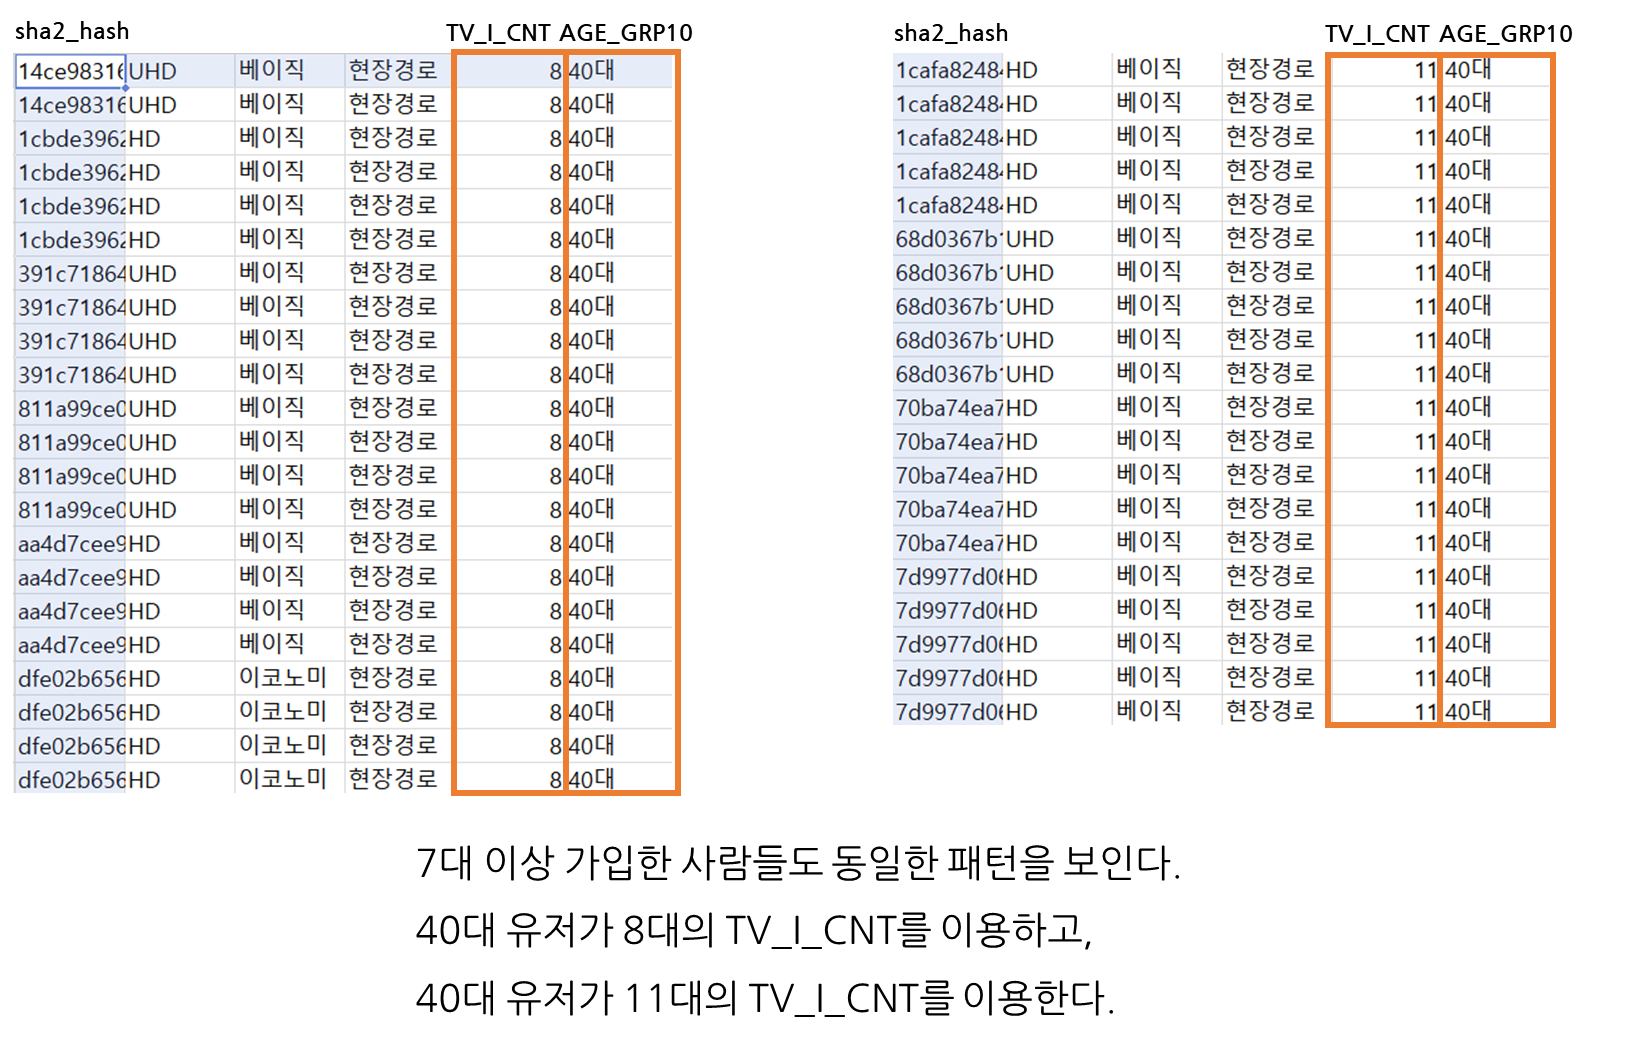

7대 이상 가입한 사람들도 동일한 패턴을 보인다.

⭐ 해당 과정을 통해 7대 이상을 사용하는 유저들은 동일한 인물이 여러 대의 셋톱, 인터넷 서비스를 사용하고 있다고 판단되었다.<BR><BR>
해당 고객들을 우량 고객으로 판단하여 따로 빼내어 관리할 수 있도록 한다.

In [71]:
# TV_I_CNT가 7대 이상인 유저들의 ID 추출
tv_i_over_7_id = df.loc[df['TV_I_CNT'] >= 7, 'sha2_hash'].unique()

# 해당 유저들만 포함된 데이터프레임 생성
tviover7 = df[df['sha2_hash'].isin(tv_i_over_7_id)]

In [72]:
tviover7

sha2_hash  \
440       00014e00569841a8546a617705f8c8134a9a68e5fade029253f09cc62820dbd0   
441       00014e00569841a8546a617705f8c8134a9a68e5fade029253f09cc62820dbd0   
442       00014e00569841a8546a617705f8c8134a9a68e5fade029253f09cc62820dbd0   
443       00014e00569841a8546a617705f8c8134a9a68e5fade029253f09cc62820dbd0   
444       00014e00569841a8546a617705f8c8134a9a68e5fade029253f09cc62820dbd0   
...                                                                    ...   
22465447  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465448  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465449  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465450  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   
22465451  fffbf7ef7a1bc999e64f53f75f5fc97a2d98782699d41791601d01b592382da9   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
440       202302          36개월 이상           HD         베이직           N   
441       202303          36개월 이상           HD         베이직           N   
442       202304          36개월 이상           HD         베이직           N   
443       202305          36개월 이상           HD         베이직           N   
444       202306          36개월 이상           HD         베이직           N   
...          ...              ...          ...         ...         ...   
22465447  202308     24개월~ 36개월미만           HD        이코노미           N   
22465448  202309     24개월~ 36개월미만           HD        이코노미           N   
22465449  202310     24개월~ 36개월미만           HD        이코노미           N   
22465450  202311     24개월~ 36개월미만           HD        이코노미           N   
22465451  202312     24개월~ 36개월미만           HD        이코노미           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
440                     N          재약정             N                0건   
441                     N          재약정             N                0건   
442                     N          재약정             N                0건   
443                     N          재약정             N                0건   
444                     N          재약정             N                0건   
...                   ...          ...           ...               ...   
22465447                N           신규             N                0건   
22465448                N           신규             N                0건   
22465449                N           신규             N                0건   
22465450                N           신규             N                0건   
22465451                N           신규             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
440                     1건              I/B        50.0  약정만료전 12개월이상   
441                     0건              I/B        40.0  약정만료전 12개월이상   
442                     0건              I/B        40.0  약정만료전 12개월이상   
443                     0건              I/B        40.0  약정만료전 12개월이상   
444                     0건              I/B        40.0  약정만료전 12개월이상   
...                    ...              ...         ...           ...   
22465447                0건             현장경로         0.0  약정만료전 9~12개월   
22465448                0건             현장경로         0.0   약정만료전 6~9개월   
22465449                0건             현장경로         0.0   약정만료전 6~9개월   
22465450                0건             현장경로         0.0   약정만료전 6~9개월   
22465451                0건             현장경로         0.0   약정만료전 3~6개월   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
440          20240804             2916         Y               Y   
441          20240804             2947         Y               Y   
442          20240804             2977         Y               Y   
443          20240804             3008         Y               Y   
444          20240804             3038         Y               Y   
...               ...              ...       ...             ... 

In [73]:
# tviover7 데이터프레임을 CSV로 저장
tviover7.to_csv('data/largeCustomerover7.csv', index=False)

그럼 이제 원본 데이터에서 해당 유저들을 제거

In [74]:
# 원본 데이터 df에서 TV_I_CNT의 값이 7 이상인 유저들을 제거

df = df[~df['sha2_hash'].isin(tv_i_over_7_id)]

In [75]:
# 22,206,592 rows

df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22466787  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22466788  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22466789  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22466790  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22466791  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0         202302      12개월~24개월미만           HD        이코노미           N   
1         202303     24개월~ 36개월미만           HD        이코노미           N   
2         202304     24개월~ 36개월미만           HD        이코노미           N   
3         202305     24개월~ 36개월미만           HD        이코노미           N   
4         202306     24개월~ 36개월미만           HD        이코노미           N   
...          ...              ...          ...         ...         ...   
22466787  202308          36개월 이상           HD         베이직           N   
22466788  202309          36개월 이상           HD         베이직           N   
22466789  202310          36개월 이상           HD         베이직           N   
22466790  202311          36개월 이상           HD         베이직           N   
22466791  202312          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22466787                N           신규             N                0건   
22466788                N           신규             N                0건   
22466789                N           신규             N                0건   
22466790                N           신규             N                0건   
22466791                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22466787                0건             현장경로        10.0  약정만료후 12개월이상   
22466788                0건             현장경로        10.0  약정만료후 12개월이상   
22466789                0건             현장경로        10.0  약정만료후 12개월이상   
22466790                0건             현장경로         0.0  약정만료후 12개월이상   
22466791                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
0            20240325              733         Y               Y   
1            20240325              764         Y               Y   
2            20240325              794         Y               Y   
3            20240325              825         Y               Y   
4            20240325              855         Y               Y   
...               ...              ...       ...             ... 

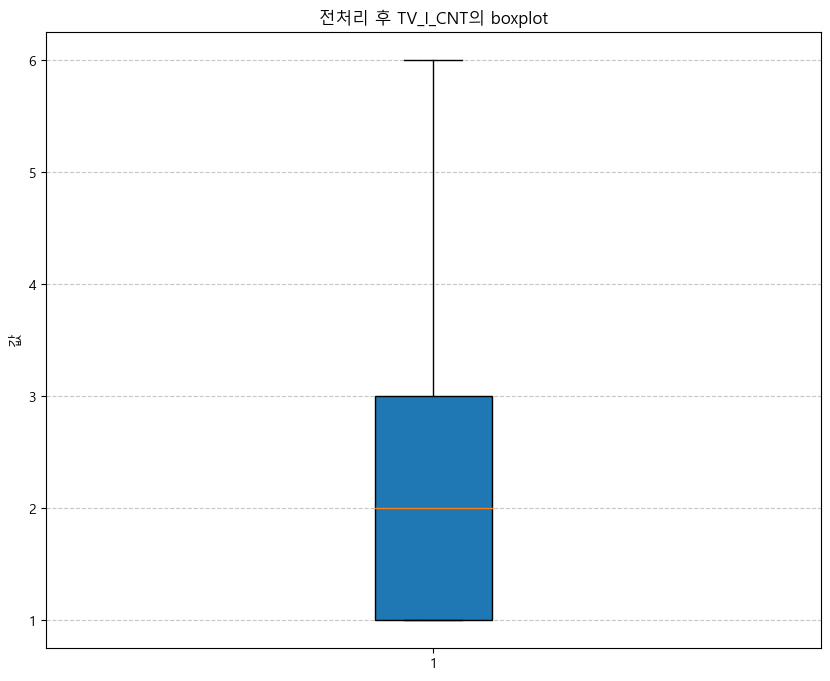

In [76]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['TV_I_CNT'], patch_artist=True)
plt.title(f"전처리 후 TV_I_CNT의 boxplot")
plt.ylabel("값")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [77]:
churn_counts = df['churn'].value_counts(normalize=True) * 100
churn_counts

churn
N   99.39
Y    0.61
Name: proportion, dtype: float64

---

## 1단계로 이상치 제거하고 boxplot 확인

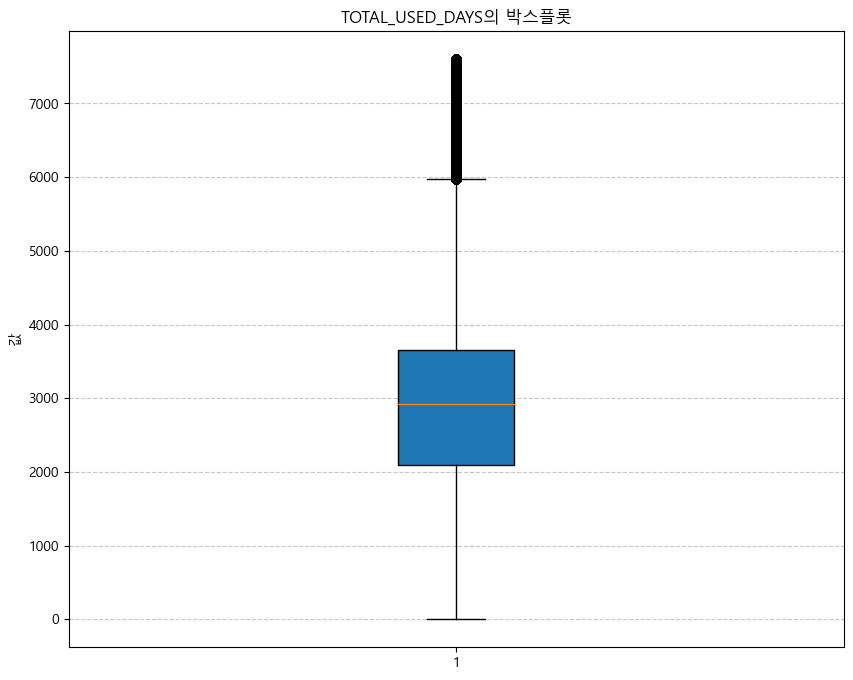

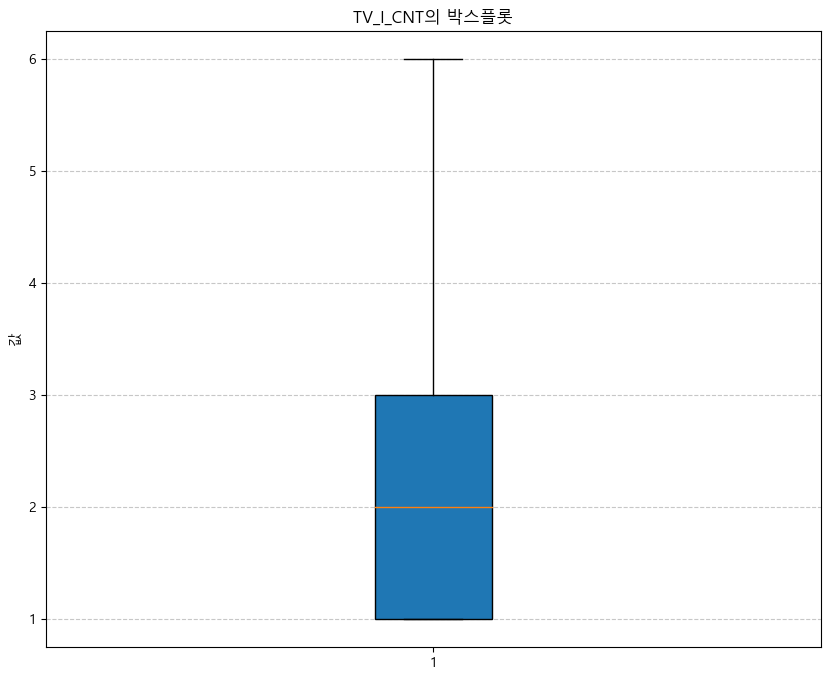

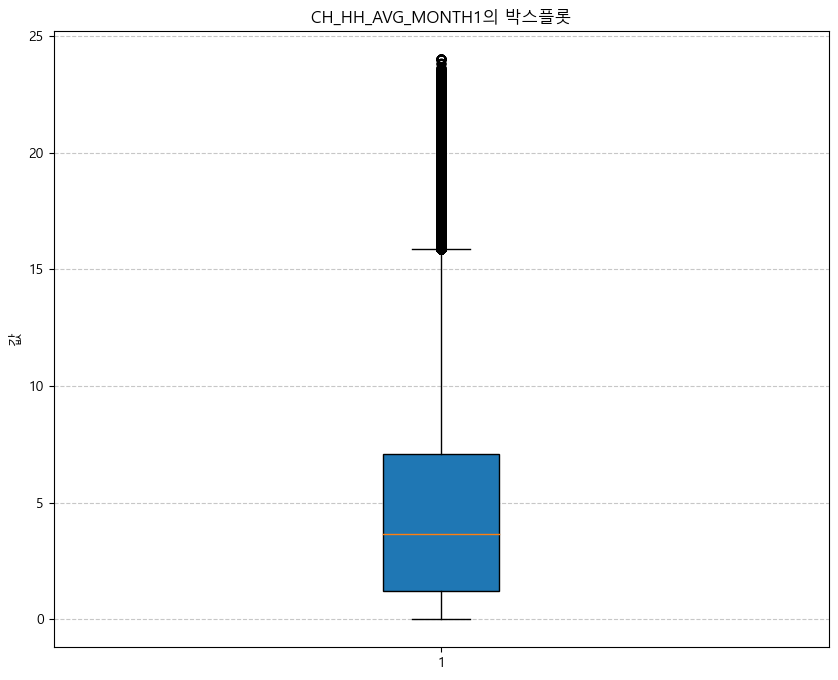

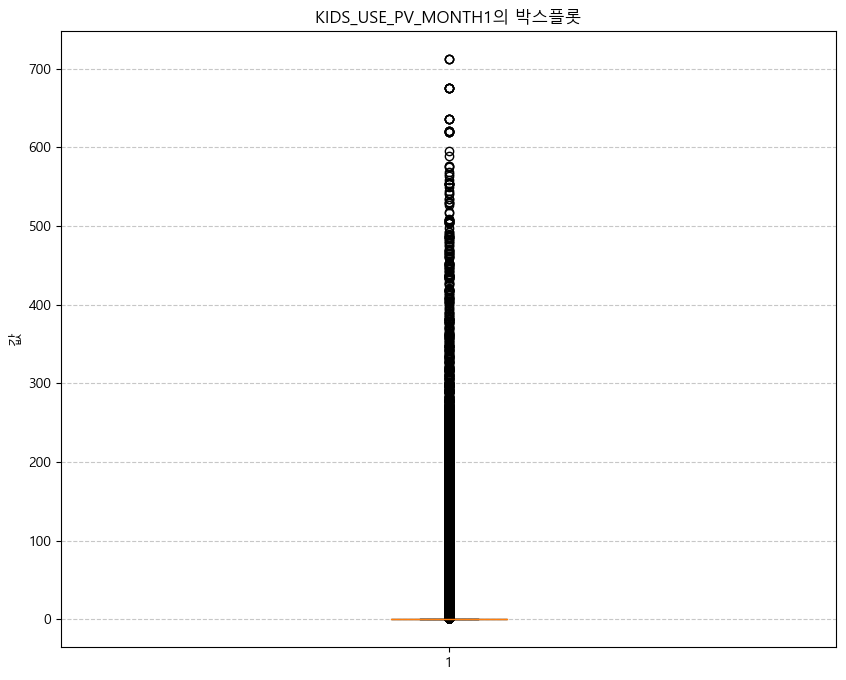

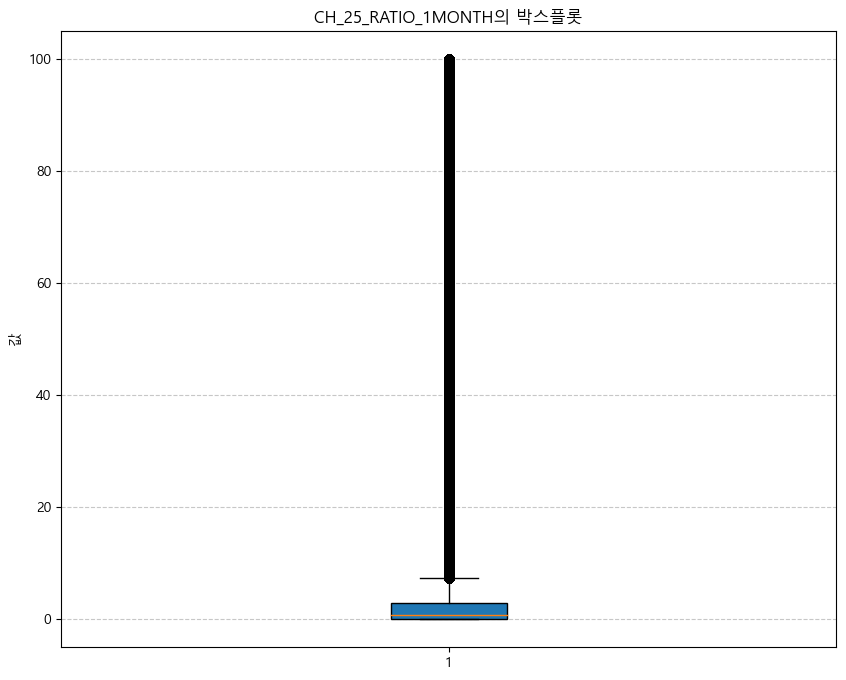

In [78]:
continuous_columns = df.select_dtypes(include=['int64','float64'])
continuous_columns = continuous_columns.drop(columns=['p_mt'])
for column in continuous_columns.columns:
    plt.figure(figsize=(10, 8))
    plt.boxplot(df[column], patch_artist=True)
    plt.title(f"{column}의 박스플롯")
    plt.ylabel("값")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [79]:
for column in continuous_columns.columns:
    print(f"\n{column} - 박스플롯 통계")
    desc = df[column].describe()  # 기본 통계값 계산
    iqr = desc['75%'] - desc['25%']  # IQR 계산
    lower_bound = desc['25%'] - 1.5 * iqr  # 하한값
    upper_bound = desc['75%'] + 1.5 * iqr  # 상한값
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]  # 이상치 계산

    print(f"최솟값 (Min): {desc['min']}")
    print(f"1사분위수 (Q1): {desc['25%']}")
    print(f"중앙값 (Median): {desc['50%']}")
    print(f"3사분위수 (Q3): {desc['75%']}")
    print(f"최댓값 (Max): {desc['max']}")
    print(f"IQR: {iqr}")
    print(f"하한값 (Lower Bound): {lower_bound}")
    print(f"상한값 (Upper Bound): {upper_bound}\n")


TOTAL_USED_DAYS - 박스플롯 통계
최솟값 (Min): 0.0
1사분위수 (Q1): 2098.0
중앙값 (Median): 2920.0
3사분위수 (Q3): 3649.0
최댓값 (Max): 7600.0
IQR: 1551.0
하한값 (Lower Bound): -228.5
상한값 (Upper Bound): 5975.5


TV_I_CNT - 박스플롯 통계
최솟값 (Min): 1.0
1사분위수 (Q1): 1.0
중앙값 (Median): 2.0
3사분위수 (Q3): 3.0
최댓값 (Max): 6.0
IQR: 2.0
하한값 (Lower Bound): -2.0
상한값 (Upper Bound): 6.0


CH_HH_AVG_MONTH1 - 박스플롯 통계
최솟값 (Min): 0.0
1사분위수 (Q1): 1.2
중앙값 (Median): 3.66
3사분위수 (Q3): 7.07
최댓값 (Max): 24.0
IQR: 5.87
하한값 (Lower Bound): -7.6049999999999995
상한값 (Upper Bound): 15.875


KIDS_USE_PV_MONTH1 - 박스플롯 통계
최솟값 (Min): 0.0
1사분위수 (Q1): 0.0
중앙값 (Median): 0.0
3사분위수 (Q3): 0.0
최댓값 (Max): 712.0
IQR: 0.0
하한값 (Lower Bound): 0.0
상한값 (Upper Bound): 0.0


CH_25_RATIO_1MONTH - 박스플롯 통계
최솟값 (Min): 0.0
1사분위수 (Q1): 0.0
중앙값 (Median): 0.85
3사분위수 (Q3): 2.92
최댓값 (Max): 100.0
IQR: 2.92
하한값 (Lower Bound): -4.38
상한값 (Upper Bound): 7.3



In [80]:
df.to_csv("data/full_data/TPS_cancel_data_preprocessing6.csv", index=False)

### INHOME_RATE가 알 수 없음인 데이터를 확인해보자

In [7]:
df = pd.read_csv("data/full_data/TPS_cancel_data_preprocessing6.csv")

In [8]:
df['INHOME_RATE'].value_counts()

INHOME_RATE
10.0     3946720
0.0      3557641
20.0     3510970
알수없음     2976063
30.0     2928652
40.0     2262038
50.0     1582230
60.0      916720
70.0      385783
80.0      119165
90.0       20507
100.0        103
Name: count, dtype: int64

In [9]:
df_test = df[df['INHOME_RATE'] == '알수없음']
df_0 = df[df['INHOME_RATE'] == '0.0']

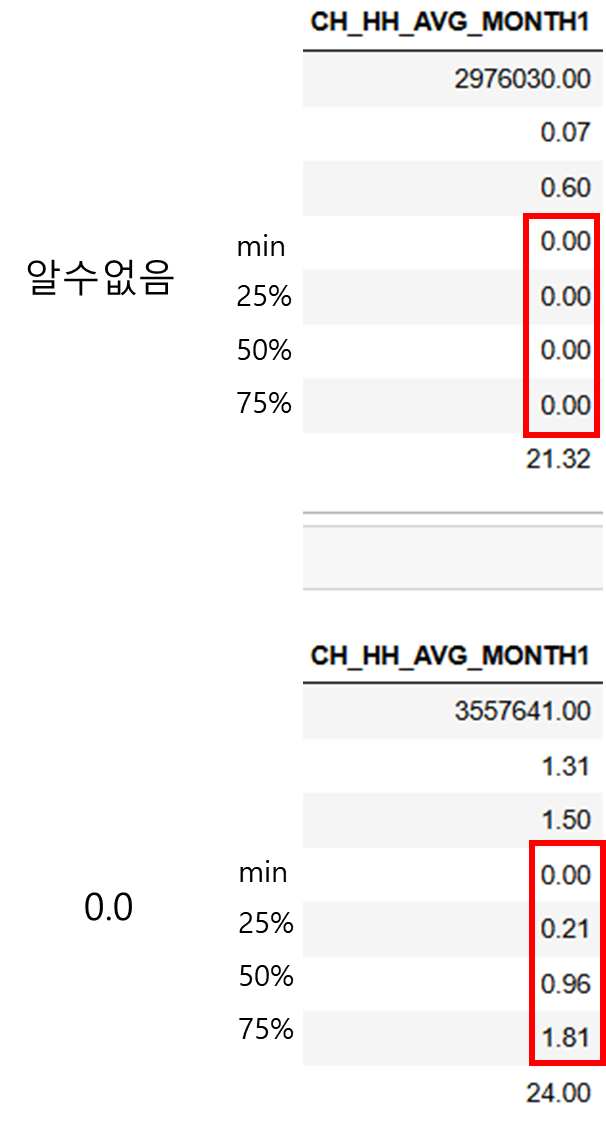

#### INHOME_RATE가 '알수없음'인 유저들이
#### INHOME_RATE(집돌이 지수, 시청시간으로 계산됨)가 0.0인 사람들보다, TV를 보지 않는다.
#### CH_HH_AVG_MONHT1의 중앙값, 전체 데이터의 75%까지 0이다.
#### INHOME_RATE가 90.0같이 높은 사람들은 CH_HH_AVG_MONTH1의 값도 높다.

In [10]:
# 알수없음
df_test['CH_HH_AVG_MONTH1'].describe()

count   2976063.00
mean          0.07
std           0.60
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          21.32
Name: CH_HH_AVG_MONTH1, dtype: float64

In [11]:
# 0.0
df_0['CH_HH_AVG_MONTH1'].describe()

count   3557641.00
mean          1.31
std           1.50
min           0.00
25%           0.21
50%           0.96
75%           1.81
max          24.00
Name: CH_HH_AVG_MONTH1, dtype: float64

In [12]:
df_9 = df[df['INHOME_RATE'] == '90.0']
df_9['CH_HH_AVG_MONTH1'].describe()

count   20507.00
mean       19.36
std         3.62
min         0.00
25%        19.01
50%        20.20
75%        21.18
max        24.00
Name: CH_HH_AVG_MONTH1, dtype: float64

### boxplot을 그려보자
- boxplot에서도 보다시피, 0.0인 사람들의 TV 시청 시간이 평균적으로 더 높다.

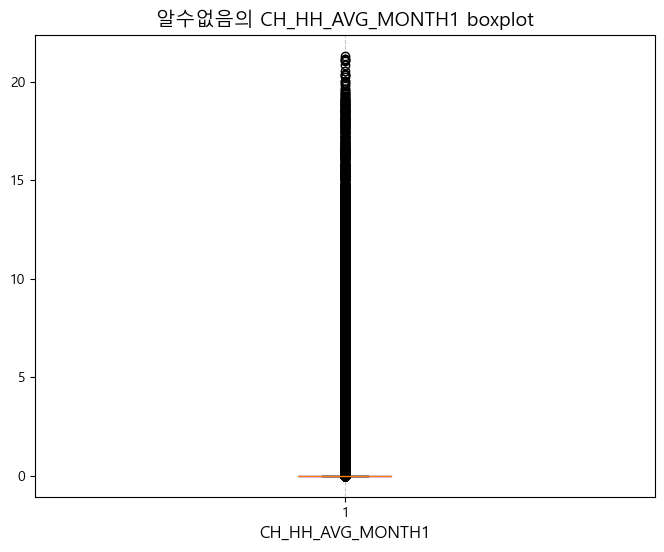

In [14]:
# INHOME_RATE = 알수없음
plt.figure(figsize=(8, 6))
plt.boxplot(df_test['CH_HH_AVG_MONTH1'], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue", color="blue"))
plt.title("알수없음의 CH_HH_AVG_MONTH1 boxplot", fontsize=14)
plt.xlabel("CH_HH_AVG_MONTH1", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

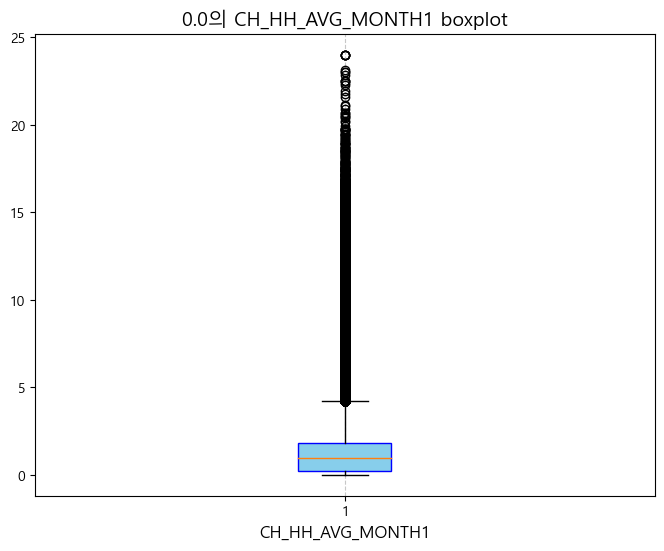

In [15]:
# INHOME_RATE = 0.0
plt.figure(figsize=(8, 6))
plt.boxplot(df_0['CH_HH_AVG_MONTH1'], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue", color="blue"))
plt.title("0.0의 CH_HH_AVG_MONTH1 boxplot", fontsize=14)
plt.xlabel("CH_HH_AVG_MONTH1", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

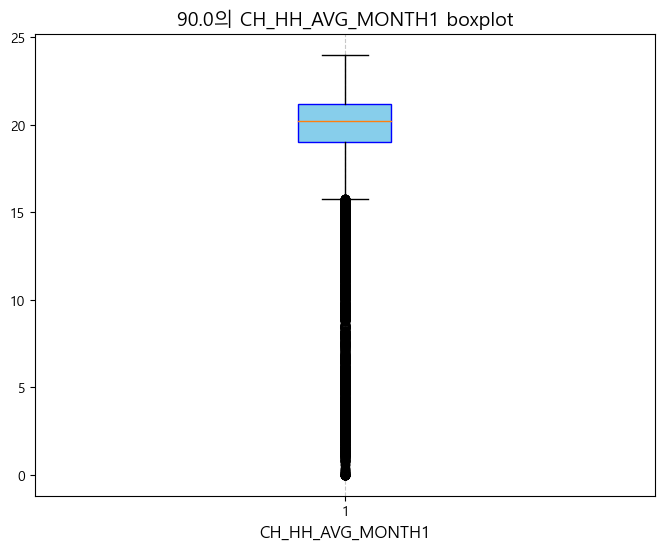

In [17]:
# INHOME_RATE = 알수없음
plt.figure(figsize=(8, 6))
plt.boxplot(df_9['CH_HH_AVG_MONTH1'], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue", color="blue"))
plt.title("90.0의 CH_HH_AVG_MONTH1 boxplot", fontsize=14)
plt.xlabel("CH_HH_AVG_MONTH1", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 집돌이지수가 알수없음 중에서, CH_HH_AVG_MONTH1이 0이 넘는 유저들을 봐보자

In [18]:
df_test[df_test['CH_HH_AVG_MONTH1'] > 0]

sha2_hash  \
473       000172b9ec31457abb7b26aa1be065f8c3aa3da42ececd0f4d9fa4f564cd4948   
951       00028400cc8c639dd1c742a5a739dc33a2fc4b8e14520d664a93c17a21005b51   
1042      0002cdcc65c08242f82ed4b6e7d4a2a20a4e4a7d1478d6ac9840af9206cf4552   
1043      0002cdcc65c08242f82ed4b6e7d4a2a20a4e4a7d1478d6ac9840af9206cf4552   
1576      000499e30d6281044ec3d080518a9848226db79e4962d38dd1a14d3a926e34c6   
...                                                                    ...   
22205015  fffb2b57a115d3dcc3d1a725ad238a402ce1186aaee0751108754727c669e23c   
22205027  fffb44504a7e57b85e3b92f320a2752f15e6afdf16a1fde36f7ba000e2a96902   
22205073  fffb5929bb08d9e4b35d2f0f5d95c3072e23c507956f85ce2596c572ae0c8692   
22205203  fffbcb9d521f7c5941d8cb156fe861e0643bc0ff2f3787d27e43ee7fd296afe0   
22205474  fffc86278e733e0eecfe93ff099c5de06bdaabfb4510a95eb241e9778d4ed87e   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
473       202311            6개월미만           HD        이코노미           N   
951       202305          36개월 이상           HD        이코노미           N   
1042      202311          36개월 이상           HD         베이직           N   
1043      202312          36개월 이상           HD         베이직           N   
1576      202305          36개월 이상           HD         베이직           N   
...          ...              ...          ...         ...         ...   
22205015  202310     24개월~ 36개월미만           HD        이코노미           N   
22205027  202311          36개월 이상           HD        프리미엄           N   
22205073  202312            6개월미만          UHD         베이직           N   
22205203  202310       6개월~12개월미만           HD        이코노미           N   
22205474  202302     24개월~ 36개월미만           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
473                     Y           신규             Y                0건   
951                     Y          재약정             N                0건   
1042                    N          재약정             N                0건   
1043                    N          재약정             N                0건   
1576                    Y          재약정             N                0건   
...                   ...          ...           ...               ...   
22205015                Y           신규             N                0건   
22205027                N         약정승계             N                0건   
22205073                N           신규             Y                0건   
22205203                Y           신규             N                0건   
22205474                N          재약정             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
473                     0건              I/B        알수없음  약정만료전 12개월이상   
951                     0건              I/B        알수없음  약정만료전 12개월이상   
1042                    0건             일반상담        알수없음  약정만료전 12개월이상   
1043                    0건             일반상담        알수없음  약정만료전 12개월이상   
1576                    0건              O/B        알수없음  약정만료전 9~12개월   
...                    ...              ...         ...           ...   
22205015                0건             현장경로        알수없음  약정만료전 9~12개월   
22205027                0건              O/B        알수없음  약정만료후 12개월이상   
22205073                0건             현장경로        알수없음  약정만료전 12개월이상   
22205203                0건              I/B        알수없음  약정만료전 12개월이상   
22205474                0건              O/B        알수없음  약정만료전 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
473          20261117             1137         Y               Y   
951          20260412             3155         N               N   
1042         20250616             2915         Y               N   
1043         20250616             2946         Y               N   
1576         20240523             3556         Y               N   
...               ...              ...       ...             ... 

In [19]:
# 알 수 없음인 데이터만 모아놨을 때, CH_HH_AVG_MONTH1의 값이 0.0이면 무조건 알 수 없음이다.

df_test[df_test['CH_HH_AVG_MONTH1'] == 0.0]['INHOME_RATE'].value_counts()

INHOME_RATE
알수없음    2868591
Name: count, dtype: int64

CH_HH_AVG_MONTH1, 즉 시청시간이 0시간이면 알 수 없음임! 이거는 TV를 거의 보지 않는다는 것을 의미하기에 INHOME_RATE는 0.0이 되어야함!

### 일단 CH_HH_AVG_MONTH1이 0인 애들은 INHOME_RATE를 '0.0'으로 바꾸자

In [20]:
# INHOME_RATE 업데이트
df.loc[(df['INHOME_RATE'] == '알수없음') & (df['CH_HH_AVG_MONTH1'] == 0.0), 'INHOME_RATE'] = '0.0'

In [21]:
# 알수없음이면서 CH_HH_AVG_MONTH1이 0인 데이터들의 값을 INHOME_RATE의 값을 0.0으로 변경
df[(df['INHOME_RATE'] == '알수없음') & (df['CH_HH_AVG_MONTH1'] == 0.0)]

Empty DataFrame
Columns: [sha2_hash, p_mt, SVC_USE_DAYS_GRP, MEDIA_NM_GRP, PROD_NM_GRP, PROD_OLD_YN, PROD_ONE_PLUS_YN, AGMT_KIND_NM, STB_RES_1M_YN, SVOD_SCRB_CNT_GRP, PAID_CHNL_CNT_GRP, SCRB_PATH_NM_GRP, INHOME_RATE, AGMT_END_SEG, AGMT_END_YMD, TOTAL_USED_DAYS, BUNDLE_YN, DIGITAL_GIGA_YN, DIGITAL_ALOG_YN, TV_I_CNT, CH_LAST_DAYS_BF_GRP, VOC_TOTAL_MONTH1_YN, VOC_STOP_CANCEL_MONTH1_YN, AGE_GRP10, EMAIL_RECV_CLS_NM, SMS_SEND_CLS_NM, CH_HH_AVG_MONTH1, CH_FAV_RNK1, KIDS_USE_PV_MONTH1, NFX_USE_YN, YTB_USE_YN, churn, CH_25_RATIO_1MONTH]
Index: []

In [22]:
df['INHOME_RATE'].value_counts()

INHOME_RATE
0.0      6426232
10.0     3946720
20.0     3510970
30.0     2928652
40.0     2262038
50.0     1582230
60.0      916720
70.0      385783
80.0      119165
알수없음      107472
90.0       20507
100.0        103
Name: count, dtype: int64

In [23]:
df[['INHOME_RATE','CH_HH_AVG_MONTH1']]

INHOME_RATE  CH_HH_AVG_MONTH1
0               10.0              0.00
1                0.0              6.72
2               10.0              9.86
3               10.0              5.95
4                0.0              4.03
...              ...               ...
22206587        10.0              2.03
22206588        10.0              2.91
22206589        10.0              1.97
22206590         0.0              0.00
22206591         0.0              0.00

[22206592 rows x 2 columns]

### 알 수 없음을 가진 값들 중에서 churn이 얼마나 있는지?

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# inhomerate별 churn 분포 계산
churn_distribution = df.groupby('INHOME_RATE')['churn'].value_counts(normalize=True).unstack()

# 결과 출력
print("INHOME_RATE의 해지 분포:")
print(churn_distribution)

INHOME_RATE의 해지 분포:
churn          N    Y
INHOME_RATE          
0.0         0.99 0.01
10.0        0.99 0.01
100.0       1.00  NaN
20.0        1.00 0.00
30.0        1.00 0.00
40.0        1.00 0.00
50.0        1.00 0.00
60.0        1.00 0.00
70.0        1.00 0.00
80.0        1.00 0.00
90.0        1.00 0.00
알수없음        0.99 0.01


In [26]:
in_id = df.loc[df['INHOME_RATE'] == '알수없음', 'sha2_hash'].unique()

In [27]:
df[df['sha2_hash'].isin(in_id)]

sha2_hash  \
473       000172b9ec31457abb7b26aa1be065f8c3aa3da42ececd0f4d9fa4f564cd4948   
474       000172b9ec31457abb7b26aa1be065f8c3aa3da42ececd0f4d9fa4f564cd4948   
948       00028400cc8c639dd1c742a5a739dc33a2fc4b8e14520d664a93c17a21005b51   
949       00028400cc8c639dd1c742a5a739dc33a2fc4b8e14520d664a93c17a21005b51   
950       00028400cc8c639dd1c742a5a739dc33a2fc4b8e14520d664a93c17a21005b51   
...                                                                    ...   
22205480  fffc86278e733e0eecfe93ff099c5de06bdaabfb4510a95eb241e9778d4ed87e   
22205481  fffc86278e733e0eecfe93ff099c5de06bdaabfb4510a95eb241e9778d4ed87e   
22205482  fffc86278e733e0eecfe93ff099c5de06bdaabfb4510a95eb241e9778d4ed87e   
22205483  fffc86278e733e0eecfe93ff099c5de06bdaabfb4510a95eb241e9778d4ed87e   
22205484  fffc86278e733e0eecfe93ff099c5de06bdaabfb4510a95eb241e9778d4ed87e   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
473       202311            6개월미만           HD        이코노미           N   
474       202312            6개월미만           HD        이코노미           N   
948       202302          36개월 이상           HD        이코노미           N   
949       202303          36개월 이상           HD        이코노미           N   
950       202304          36개월 이상           HD        이코노미           N   
...          ...              ...          ...         ...         ...   
22205480  202308          36개월 이상           HD         베이직           N   
22205481  202309          36개월 이상           HD         베이직           N   
22205482  202310          36개월 이상           HD         베이직           N   
22205483  202311          36개월 이상           HD         베이직           N   
22205484  202312          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
473                     Y           신규             Y                0건   
474                     Y           신규             N                0건   
948                     Y          재약정             Y                0건   
949                     Y          재약정             Y                0건   
950                     Y          재약정             Y                0건   
...                   ...          ...           ...               ...   
22205480                N          재약정             N                0건   
22205481                N          재약정             N                0건   
22205482                N          재약정             N                0건   
22205483                N          재약정             N                0건   
22205484                N          재약정             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
473                     0건              I/B        알수없음  약정만료전 12개월이상   
474                     0건              I/B         0.0  약정만료전 12개월이상   
948                     0건              I/B         0.0   약정만료후 3~6개월   
949                     0건              I/B         0.0   약정만료후 3~6개월   
950                     0건              I/B         0.0  약정만료전 12개월이상   
...                    ...              ...         ...           ...   
22205480                0건              O/B         0.0  약정만료전 12개월이상   
22205481                0건              O/B         0.0  약정만료전 12개월이상   
22205482                0건              O/B         0.0  약정만료전 12개월이상   
22205483                0건              O/B         0.0  약정만료전 12개월이상   
22205484                0건              O/B         0.0  약정만료전 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
473          20261117             1137         Y               Y   
474          20261117             1168         Y               Y   
948          20221111             3063         N               N   
949          20221111             3094         N               N   
950          20260412             3124         N               N   
...               ...              ...       ...             ... 

### INHOME_RATE가 알수없음 값을 가지는 sha2_hash의 모든 행을 제거
22,099,087

In [28]:
# '알수없음' 값을 가진 id 찾기
ids_to_remove = df.loc[df['INHOME_RATE'] == '알수없음', 'sha2_hash'].unique()

In [29]:
ids_to_remove

array(['000172b9ec31457abb7b26aa1be065f8c3aa3da42ececd0f4d9fa4f564cd4948',
       '00028400cc8c639dd1c742a5a739dc33a2fc4b8e14520d664a93c17a21005b51',
       '0002cdcc65c08242f82ed4b6e7d4a2a20a4e4a7d1478d6ac9840af9206cf4552',
       ...,
       'fffb5929bb08d9e4b35d2f0f5d95c3072e23c507956f85ce2596c572ae0c8692',
       'fffbcb9d521f7c5941d8cb156fe861e0643bc0ff2f3787d27e43ee7fd296afe0',
       'fffc86278e733e0eecfe93ff099c5de06bdaabfb4510a95eb241e9778d4ed87e'],
      dtype=object)

In [30]:
# 해당 id를 가진 모든 행 제거
df_cleaned = df[~df['sha2_hash'].isin(ids_to_remove)]

In [32]:
df_cleaned[df_cleaned['INHOME_RATE'] == '알수없음']

Empty DataFrame
Columns: [sha2_hash, p_mt, SVC_USE_DAYS_GRP, MEDIA_NM_GRP, PROD_NM_GRP, PROD_OLD_YN, PROD_ONE_PLUS_YN, AGMT_KIND_NM, STB_RES_1M_YN, SVOD_SCRB_CNT_GRP, PAID_CHNL_CNT_GRP, SCRB_PATH_NM_GRP, INHOME_RATE, AGMT_END_SEG, AGMT_END_YMD, TOTAL_USED_DAYS, BUNDLE_YN, DIGITAL_GIGA_YN, DIGITAL_ALOG_YN, TV_I_CNT, CH_LAST_DAYS_BF_GRP, VOC_TOTAL_MONTH1_YN, VOC_STOP_CANCEL_MONTH1_YN, AGE_GRP10, EMAIL_RECV_CLS_NM, SMS_SEND_CLS_NM, CH_HH_AVG_MONTH1, CH_FAV_RNK1, KIDS_USE_PV_MONTH1, NFX_USE_YN, YTB_USE_YN, churn, CH_25_RATIO_1MONTH]
Index: []

In [33]:
df = df_cleaned

In [34]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
22206587  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22206588  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22206589  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22206590  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
22206591  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0         202302      12개월~24개월미만           HD        이코노미           N   
1         202303     24개월~ 36개월미만           HD        이코노미           N   
2         202304     24개월~ 36개월미만           HD        이코노미           N   
3         202305     24개월~ 36개월미만           HD        이코노미           N   
4         202306     24개월~ 36개월미만           HD        이코노미           N   
...          ...              ...          ...         ...         ...   
22206587  202308          36개월 이상           HD         베이직           N   
22206588  202309          36개월 이상           HD         베이직           N   
22206589  202310          36개월 이상           HD         베이직           N   
22206590  202311          36개월 이상           HD         베이직           N   
22206591  202312          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           신규             N                0건   
1                       Y           신규             Y                0건   
2                       Y           신규             N                0건   
3                       Y           신규             N                0건   
4                       Y           신규             N                0건   
...                   ...          ...           ...               ...   
22206587                N           신규             N                0건   
22206588                N           신규             N                0건   
22206589                N           신규             N                0건   
22206590                N           신규             N                0건   
22206591                N           신규             Y                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
0                       0건              I/B        10.0  약정만료전 12개월이상   
1                       0건              I/B         0.0  약정만료전 9~12개월   
2                       0건              I/B        10.0  약정만료전 9~12개월   
3                       0건              I/B        10.0  약정만료전 9~12개월   
4                       0건              I/B         0.0   약정만료전 6~9개월   
...                    ...              ...         ...           ...   
22206587                0건             현장경로        10.0  약정만료후 12개월이상   
22206588                0건             현장경로        10.0  약정만료후 12개월이상   
22206589                0건             현장경로        10.0  약정만료후 12개월이상   
22206590                0건             현장경로         0.0  약정만료후 12개월이상   
22206591                0건             현장경로         0.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
0            20240325              733         Y               Y   
1            20240325              764         Y               Y   
2            20240325              794         Y               Y   
3            20240325              825         Y               Y   
4            20240325              855         Y               Y   
...               ...              ...       ...             ... 

## AGE_GRP10 컬럼을 봐보자

In [35]:
df['AGE_GRP10'].value_counts()

AGE_GRP10
60대      6062980
50대      4461937
70대      4372734
40대      2680052
80대      2422108
30대       921428
90대이상     329057
20대       176859
연령없음       56065
10대          192
10대미만          3
Name: count, dtype: int64

In [36]:
## 10대 미만은 그냥 없는 사람으로 치자, 9살이 가입을 한다는건.. 말이 안되는 것 같다.
df = df[df['AGE_GRP10'] != '10대미만']

In [37]:
df[df['churn'] == 'Y']['AGE_GRP10'].value_counts(normalize=True) * 100

AGE_GRP10
60대     24.33
50대     24.15
40대     16.22
70대     12.73
80대      9.24
30대      8.25
20대      2.45
90대이상    2.43
연령없음     0.21
Name: proportion, dtype: float64

In [38]:
age_id = df[df['AGE_GRP10'] == '연령없음']['sha2_hash'].unique()

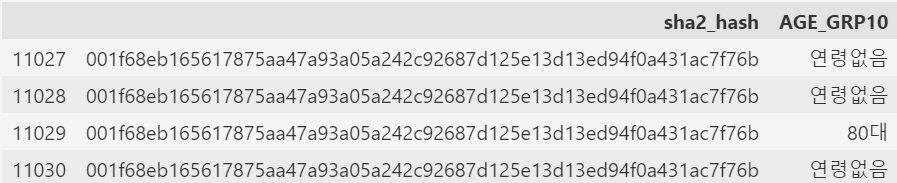

#### 위에 첨부한 사진 처럼, 같은 sha2_hash임에도 불구하고, 연령이 누락된 경우가 있다. 이런 경우에는 원래 있는 나이대로 다 채워넣자

In [39]:
filter_df = df[df['sha2_hash'].isin(age_id)]

In [40]:
filter_df

sha2_hash  \
5262      000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5263      000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5264      000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5265      000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5266      000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
...                                                                    ...   
22203681  fff72b6bbcae8d2dc46203078d2ff1e0afc9831d3dfc0c1e039b81d605a7b9af   
22203682  fff72b6bbcae8d2dc46203078d2ff1e0afc9831d3dfc0c1e039b81d605a7b9af   
22203683  fff72b6bbcae8d2dc46203078d2ff1e0afc9831d3dfc0c1e039b81d605a7b9af   
22203684  fff72b6bbcae8d2dc46203078d2ff1e0afc9831d3dfc0c1e039b81d605a7b9af   
22203685  fff72b6bbcae8d2dc46203078d2ff1e0afc9831d3dfc0c1e039b81d605a7b9af   

            p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
5262      202302          36개월 이상           HD         베이직           N   
5263      202303          36개월 이상           HD         베이직           N   
5264      202304          36개월 이상           HD         베이직           N   
5265      202305          36개월 이상           HD         베이직           N   
5266      202306          36개월 이상           HD         베이직           N   
...          ...              ...          ...         ...         ...   
22203681  202308          36개월 이상           HD         베이직           N   
22203682  202309          36개월 이상           HD         베이직           N   
22203683  202310          36개월 이상           HD         베이직           N   
22203684  202311          36개월 이상           HD         베이직           N   
22203685  202312          36개월 이상           HD         베이직           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
5262                    N           신규             N                0건   
5263                    N           신규             N                0건   
5264                    N           신규             N                0건   
5265                    N           신규             N                0건   
5266                    N           신규             N                0건   
...                   ...          ...           ...               ...   
22203681                N           신규             N                0건   
22203682                N           신규             N                0건   
22203683                N           신규             N                0건   
22203684                N           신규             N                0건   
22203685                N           신규             N                0건   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
5262                    0건              O/B         0.0  약정만료후 12개월이상   
5263                    0건              O/B         0.0  약정만료후 12개월이상   
5264                    0건              O/B         0.0  약정만료후 12개월이상   
5265                    0건              O/B         0.0  약정만료후 12개월이상   
5266                    0건              O/B         0.0  약정만료후 12개월이상   
...                    ...              ...         ...           ...   
22203681                0건             현장경로        50.0  약정만료후 12개월이상   
22203682                0건             현장경로        50.0  약정만료후 12개월이상   
22203683                0건             현장경로        50.0  약정만료후 12개월이상   
22203684                0건             현장경로        50.0  약정만료후 12개월이상   
22203685                0건             현장경로        50.0  약정만료후 12개월이상   

         AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN  \
5262         20150330             3986         N               N   
5263         20150330             4017         N               N   
5264         20150330             4047         N               N   
5265         20150330             4078         N               N   
5266         20150330             4108         N               N   
...               ...              ...       ...             ... 

In [41]:
df[df['sha2_hash'] == '000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3']

sha2_hash  \
5262  000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5263  000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5264  000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5265  000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5266  000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5267  000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5268  000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5269  000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5270  000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5271  000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   
5272  000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3   

        p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
5262  202302          36개월 이상           HD         베이직           N   
5263  202303          36개월 이상           HD         베이직           N   
5264  202304          36개월 이상           HD         베이직           N   
5265  202305          36개월 이상           HD         베이직           N   
5266  202306          36개월 이상           HD         베이직           N   
5267  202307          36개월 이상           HD         베이직           N   
5268  202308          36개월 이상           HD         베이직           N   
5269  202309          36개월 이상           HD         베이직           N   
5270  202310          36개월 이상           HD         베이직           N   
5271  202311          36개월 이상           HD         베이직           N   
5272  202312          36개월 이상           HD         베이직           N   

     PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
5262                N           신규             N                0건   
5263                N           신규             N                0건   
5264                N           신규             N                0건   
5265                N           신규             N                0건   
5266                N           신규             N                0건   
5267                N           신규             N                0건   
5268                N           신규             N                0건   
5269                N           신규             N                0건   
5270                N           신규             N                0건   
5271                N           신규             N                0건   
5272                N           신규             N                0건   

     PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP INHOME_RATE  AGMT_END_SEG  \
5262                0건              O/B         0.0  약정만료후 12개월이상   
5263                0건              O/B         0.0  약정만료후 12개월이상   
5264                0건              O/B         0.0  약정만료후 12개월이상   
5265                0건              O/B         0.0  약정만료후 12개월이상   
5266                0건              O/B         0.0  약정만료후 12개월이상   
5267                0건              O/B         0.0  약정만료후 12개월이상   
5268                0건              O/B         0.0  약정만료후 12개월이상   
5269                0건              O/B         0.0  약정만료후 12개월이상   
5270                0건              O/B        10.0  약정만료후 12개월이상   
5271                0건              O/B        10.0  약정만료후 12개월이상   
5272                0건              O/B        10.0  약정만료후 12개월이상   

     AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN DIGITAL_ALOG_YN  \
5262     20150330             3986         N               N               N   
5263     20150330             4017         N               N               N   
5264     20150330             4047         N               N               N   
5265     20150330             4078         N               N               N   
5266     20150330             4108         N               N               N   
5267     20150330             4139         N               N               N   
5268     20150330             4170         N               N               N   
5269     20150330    

In [42]:
# ID별로 AGE_GRP10의 '연령없음' 외 다른 값 존재 여부 확인
ids_with_other_age = filter_df.groupby('sha2_hash')['AGE_GRP10'].apply(
    lambda x: any(x != '연령없음')
)

# 결과 출력
print(ids_with_other_age)

sha2_hash
000ef89564426e0aca1052c7a2872b6fdbcbed2c32daa8162bdea7b874426ed3    False
0014e68b5c87e1ecd6e1e4d7376b271f003e44485d18f69d4de99a03b9734edf     True
001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b     True
002023651ea1b443a458696643abae7da92f99905dfdf8b3f4d8b1d5031b068b    False
0023dd439eb01665c17366bb039a2e1d12914b58f066790e147cde988a77b948    False
                                                                    ...  
ffc07226641c3d53e69a27f1d1fbf22d1132396db7bec00f1057868c6290d57c    False
ffc8e0e41578dad5661921054ff3cb5f1e098a715a0d721ee23d094275aee0a8    False
ffd48446a9ddbff2a7aa3c6b5244297b253a1a4502fcfc02ce18b2aea334cc9a     True
ffd5de7ce4d5d56b147012720fe675c99b527c748ce48d98f093b482c0baaf5d    False
fff72b6bbcae8d2dc46203078d2ff1e0afc9831d3dfc0c1e039b81d605a7b9af    False
Name: AGE_GRP10, Length: 6020, dtype: bool


In [43]:
ids_with_other_age = ids_with_other_age[ids_with_other_age]  # True인 ID만 필터링
print(ids_with_other_age.index.tolist())  # 해당 ID 목록

['0014e68b5c87e1ecd6e1e4d7376b271f003e44485d18f69d4de99a03b9734edf', '001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b', '0075d5d2073be7c5e59a133234d2b627943b2d63258ed2a138875bd394ef9404', '0088251f388512eb9972271dbb9437869a4f7d25a15bf1bafdcd6ea49405d812', '00895fe4d51e88f0da0220910a5381a9989e6582b34d92fca24a5ab522ef755d', '00996cabeb28684b1c070d25125d236cbd23651093ae87348aeea83af85998a7', '00b884141c837bd0d291951c5091439666b0542235967e6e0491de230cb8aac6', '00e2583dc1fba7e78126aedaf9958c35e2abff5bf99d787804475c0967b9f8a8', '00f3309d4e98d0247790f424fdf018324d313f2903ca31dc838f2d6f22804b31', '0134a1b249df837429a2ba73c20cef3d2c1e8318efd8b0e75d38640d03f54615', '01467b243850fe488b8b955e532de95abe28fd00607faca377073faabdea884e', '01acf59a356ee169622923d4233d4abe9be80b8a1d61be6d48cfed7f09da6a51', '01e495177930616712f2e00bbb09bf61520300eb40881cb8dbe8b0f224035c81', '01ed89c5873e0807597992d4331a04378a6cfb7aa9f0b7de43d8e71488a99d68', '020a91f0fe34c63895c115cb85c797c64464c85c6121c8

In [44]:
df[df['sha2_hash'] == '001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b'][['sha2_hash','AGE_GRP10']]

sha2_hash  \
11080  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11081  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11082  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11083  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11084  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11085  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11086  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11087  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11088  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11089  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11090  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   

      AGE_GRP10  
11080      연령없음  
11081      연령없음  
11082       80대  
11083      연령없음  
11084      연령없음  
11085      연령없음  
11086      연령없음  
11087      연령없음  
11088      연령없음  
11089      연령없음  
11090       80대

In [45]:
# ID 그룹 내에서 '연령없음'을 다른 값으로 대체
def replace_missing_age(group):
    # 그룹 내에서 '연령없음'이 아닌 값 찾기
    other_age = group[group != '연령없음'].unique()
    # 만약 다른 값이 있다면 '연령없음'을 첫 번째 다른 값으로 대체
    if len(other_age) > 0:
        group = group.replace('연령없음', other_age[0])
    return group

# 'AGE_GRP10' 값 대체
df['AGE_GRP10'] = df.groupby('sha2_hash')['AGE_GRP10'].transform(replace_missing_age)

In [46]:
df[df['sha2_hash'] == '001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b'][['sha2_hash','AGE_GRP10']]

sha2_hash  \
11080  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11081  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11082  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11083  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11084  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11085  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11086  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11087  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11088  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11089  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   
11090  001f68eb165617875aa47a93a05a242c92687d125e13d13ed94f0a431ac7f76b   

      AGE_GRP10  
11080       80대  
11081       80대  
11082       80대  
11083       80대  
11084       80대  
11085       80대  
11086       80대  
11087       80대  
11088       80대  
11089       80대  
11090       80대

In [47]:
df['AGE_GRP10'].value_counts()

AGE_GRP10
60대      6065252
50대      4463345
70대      4375078
40대      2680752
80대      2424136
30대       921491
90대이상     329338
20대       176891
연령없음       46937
10대          192
Name: count, dtype: int64

In [48]:
# AGE와 churn의 비율 계산
df.groupby('AGE_GRP10')['churn'].value_counts(normalize=True).unstack() * 100

churn          N    Y
AGE_GRP10            
10대       100.00  NaN
20대        98.16 1.84
30대        98.81 1.19
40대        99.19 0.81
50대        99.28 0.72
60대        99.47 0.53
70대        99.61 0.39
80대        99.49 0.51
90대이상      99.02 0.98
연령없음       99.44 0.56

In [49]:
df.to_csv("data/full_data/TPS_cancel_data_preprocessing_end.csv", index=False)